## dependencies

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
!pip install pandas matplotlib
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 325.1 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 521.8 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/294.9 kB 610.0 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 808.4 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 840.4 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 827.5 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Rizwan Moosa Saya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import requests

def ask_mistral(prompt: str, model: str = "mistral"):
    url = "http://localhost:11434/api/generate"
    headers = {"Content-Type": "application/json"}
    data = {
        "model": model,
        "prompt": prompt,
        "stream": False  
    }

    response = requests.post(url, headers=headers, json=data)
    response.raise_for_status()
    result = response.json()
    return result["response"]

# Example usage
if __name__ == "__main__":
    reply = ask_mistral("Summarize the concept of knowledge graphs in AI.")
    print("\n Mistral says:\n", reply)



 Mistral says:
  Knowledge Graphs in AI are a powerful tool for structuring, storing, and making inferences from large amounts of complex data. They visually represent real-world entities (objects, concepts, or ideas) and the relationships between them as nodes and edges in a graph. The nodes can have attributes and values associated with them, which help enrich the understanding of the entity. Knowledge graphs are used to capture, organize, and reason over knowledge from diverse domains, enabling AI systems to perform tasks such as answering questions, making predictions, and recommending actions based on implicit relationships between data points.

Some popular examples of knowledge graphs include Google's Knowledge Graph, Wikidata, and Microsoft's entity graph. These systems help AI models improve their understanding of the world by providing a structured, easily-understandable representation of complex information. By leveraging knowledge graphs, AI can make more accurate predicti

In [5]:
!pip install requests


   ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
   ------------------------- -------------- 41.0/64.9 kB 991.0 kB/s eta 0:00:01
   ------------------------- -------------- 41.0/64.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 64.9/64.9 kB 588.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/166.4 kB ? eta -:--:--
   --------- ------------------------------ 41.0/166.4 kB 2.0 MB/s eta 0:00:01
   -------------- ------------------------ 61.4/166.4 kB 550.5 kB/s eta 0:00:01
   ---------------------------------------  163.8/166.4 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 166.4/166.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/102.4 kB ? eta -:--:--
   ---------------------------------------- 102.4/102.4 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/70.4 kB ? eta -:--:--
   ---------------------------------------- 70.4/70.4 kB 3.8 MB/s eta 0:00:00
 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Rizwan Moosa Saya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
!pip install yachalk


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Rizwan Moosa Saya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
!pip install google-generativeai


     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.7 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.7 kB 660.6 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 435.7 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 435.7 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 435.7 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 435.7 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 435.7 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 435.7 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 435.7 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 104.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/155.4 k


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Rizwan Moosa Saya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


: 

## kg funcs

In [29]:
import sys
from yachalk import chalk
sys.path.append("..")

import json
import helper.client as client


def extractConcepts(prompt: str, metadata={}, model="mistral-openorca:latest"):
    SYS_PROMPT = (
        "Your task is extract the key concepts (and non personal entities) mentioned in the given context. "
        "Extract only the most important and atomistic concepts, if  needed break the concepts down to the simpler concepts."
        "Categorize the concepts in one of the following categories: "
        "[event, concept, place, object, document, organisation, condition, misc]\n"
        "Format your output as a list of json with the following format:\n"
        "[\n"
        "   {\n"
        '       "entity": The Concept,\n'
        '       "importance": The concontextual importance of the concept on a scale of 1 to 5 (5 being the highest),\n'
        '       "category": The Type of Concept,\n'
        "   }, \n"
        "{ }, \n"
        "]\n"
    )
    response, _ = client.generate(model_name=model, system=SYS_PROMPT, prompt=prompt)
    try:
        result = json.loads(response)
        result = [dict(item, **metadata) for item in result]
    except:
        print("\n\nERROR ### Here is the buggy response: ", response, "\n\n")
        result = None
    return result


def graphPrompt(input: str, metadata={}, model="mistral-openorca:latest"):
    if model == None:
        model = "mistral-openorca:latest"

    # model_info = client.show(model_name=model)
    # print( chalk.blue(model_info))

    SYS_PROMPT = (
        "You are a network graph maker who extracts terms and their relations from a given context. "
        "You are provided with a context chunk (delimited by ```) Your task is to extract the ontology "
        "of terms mentioned in the given context. These terms should represent the key concepts as per the context. \n"
        "Thought 1: While traversing through each sentence, Think about the key terms mentioned in it.\n"
            "\tTerms may include object, entity, location, organization, person, \n"
            "\tcondition, acronym, documents, service, concept, etc.\n"
            "\tTerms should be as atomistic as possible\n\n"
        "Thought 2: Think about how these terms can have one on one relation with other terms.\n"
            "\tTerms that are mentioned in the same sentence or the same paragraph are typically related to each other.\n"
            "\tTerms can be related to many other terms\n\n"
        "Thought 3: Find out the relation between each such related pair of terms. \n\n"
        "Format your output as a list of json. Each element of the list contains a pair of terms"
        "and the relation between them, like the follwing: \n"
        "[\n"
        "   {\n"
        '       "node_1": "A concept from extracted ontology",\n'
        '       "node_2": "A related concept from extracted ontology",\n'
        '       "edge": "relationship between the two concepts, node_1 and node_2 in one or two sentences"\n'
        "   }, {...}\n"
        "]"
    )

    USER_PROMPT = f"context: ```{input}``` \n\n output: "
    response, _ = client.generate(model_name=model, system=SYS_PROMPT, prompt=USER_PROMPT)
    try:
        result = json.loads(response)
        result = [dict(item, **metadata) for item in result]
    except:
        print("\n\nERROR ### Here is the buggy response: ", response, "\n\n")
        result = None
    return result

In [31]:
import uuid
import pandas as pd
import numpy as np


def documents2Dataframe(documents) -> pd.DataFrame:
    rows = []
    for chunk in documents:
        row = {
            "text": chunk.page_content,
            **chunk.metadata,
            "chunk_id": uuid.uuid4().hex,
        }
        rows = rows + [row]

    df = pd.DataFrame(rows)
    return df


def df2ConceptsList(dataframe: pd.DataFrame) -> list:
    # dataframe.reset_index(inplace=True)
    results = dataframe.apply(
        lambda row: extractConcepts(
            row.abstract, {"chunk_id": row.arxiv_id, "type": "concept"}
        ),
        axis=1,
    )
    # invalid json results in NaN
    results = results.dropna()
    results = results.reset_index(drop=True)

    ## Flatten the list of lists to one single list of entities.
    concept_list = np.concatenate(results).ravel().tolist()
    return concept_list


def concepts2Df(concepts_list) -> pd.DataFrame:
    ## Remove all NaN entities
    concepts_dataframe = pd.DataFrame(concepts_list).replace(" ", np.nan)
    concepts_dataframe = concepts_dataframe.dropna(subset=["entity"])
    concepts_dataframe["entity"] = concepts_dataframe["entity"].apply(
        lambda x: x.lower()
    )

    return concepts_dataframe


def df2Graph(dataframe: pd.DataFrame, model=None) -> list:
    # dataframe.reset_index(inplace=True)
    results = dataframe.apply(
        lambda row: graphPrompt(row.abstract, {"chunk_id": row.arxiv_id}, model), axis=1
    )
    # invalid json results in NaN
    results = results.dropna()
    results = results.reset_index(drop=True)

    ## Flatten the list of lists to one single list of entities.
    concept_list = np.concatenate(results).ravel().tolist()
    return concept_list


def graph2Df(nodes_list) -> pd.DataFrame:
    ## Remove all NaN entities
    graph_dataframe = pd.DataFrame(nodes_list).replace(" ", np.nan)
    graph_dataframe = graph_dataframe.dropna(subset=["node_1", "node_2"])
    graph_dataframe["node_1"] = graph_dataframe["node_1"].apply(lambda x: x.lower())
    graph_dataframe["node_2"] = graph_dataframe["node_2"].apply(lambda x: x.lower())

    return graph_dataframe
print("done")

done


In [16]:
df=pd.read_csv("arxiv_metadata.csv")
df.head()

,arxiv_id,title,authors,abstract,topic,pdf_url
0,9308101v1,Dynamic Backtracking,M. L. Ginsberg,Because of their occasional need to return to ...,AI,http://arxiv.org/pdf/cs/9308101v1.pdf
1,9308102v1,A Market-Oriented Programming Environment and ...,M. P. Wellman,Market price systems constitute a well-underst...,AI,http://arxiv.org/pdf/cs/9308102v1.pdf
2,9309101v1,An Empirical Analysis of Search in GSAT,"I. P. Gent, T. Walsh",We describe an extensive study of search in GS...,AI,http://arxiv.org/pdf/cs/9309101v1.pdf
3,9311101v1,The Difficulties of Learning Logic Programs wi...,"F. Bergadano, D. Gunetti, U. Trinchero",As real logic programmers normally use cut (!)...,AI,http://arxiv.org/pdf/cs/9311101v1.pdf
4,9311102v1,Software Agents: Completing Patterns and Const...,"J. C. Schlimmer, L. A. Hermens",To support the goal of allowing users to recor...,AI,http://arxiv.org/pdf/cs/9311102v1.pdf


In [28]:

dfup = df.loc[:499, ['abstract', 'arxiv_id', 'pdf_url']]

dfup.head()

,abstract,arxiv_id,pdf_url
0,Because of their occasional need to return to ...,9308101v1,http://arxiv.org/pdf/cs/9308101v1.pdf
1,Market price systems constitute a well-underst...,9308102v1,http://arxiv.org/pdf/cs/9308102v1.pdf
2,We describe an extensive study of search in GS...,9309101v1,http://arxiv.org/pdf/cs/9309101v1.pdf
3,As real logic programmers normally use cut (!)...,9311101v1,http://arxiv.org/pdf/cs/9311101v1.pdf
4,To support the goal of allowing users to recor...,9311102v1,http://arxiv.org/pdf/cs/9311102v1.pdf


In [32]:
## To regenerate the graph with LLM, set this to True
regenerate = True
#zephyr:latest
if regenerate:
    concepts_list = df2Graph(dfup, model='zephyr:latest')
    dfg1 = graph2Df(concepts_list)
    #if not os.path.exists(outputdirectory):
    #    os.makedirs(outputdirectory)
    
    dfg1.to_csv("graph.csv", sep="|", index=False)
    df.to_csv("chunks.csv", sep="|", index=False)
else:
    dfg1 = pd.read_csv("graph.csv", sep="|")

dfg1.replace("", np.nan, inplace=True)
dfg1.dropna(subset=["node_1", "node_2", 'edge'], inplace=True)
dfg1['count'] = 4 
## Increasing the weight of the relation to 4. 
## We will assign the weight of 1 when later the contextual proximity will be calculated.  
print(dfg1.shape)
dfg1.head()

[
   {
       "node_1": "existing backtracking methods",
       "node_2": "meaningful progress toward solving a search problem",
       "edge": "Because of their occasional need to return to shallow points in a search tree, existing backtracking methods can sometimes erase meaningful progress toward solving a search problem."
   },
   {
       "node_1": "backtrack points",
       "node_2": "deeper in the search space",
       "edge": "In this paper, we present a method by which backtrack points can be moved deeper in the search space, thereby avoiding this difficulty."
   },
   {
       "node_1": "dependency-directed backtracking",
       "node_2": "useful control information",
       "edge": "The technique developed is a variant of dependency-directed backtracking that uses only polynomial space while still providing useful control information and retaining the completeness guarantees provided by earlier approaches."
   }
][
   {
       "node_1": "Market price systems",
       "node_2

KeyboardInterrupt: 

In [36]:
import pandas as pd
import json
import re

# Read the entire raw text (not a valid JSON string)
with open("graphnodes.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Split using a pattern that finds individual JSON arrays
# Each JSON array starts with '[' and ends with ']'
json_blocks = re.findall(r'\[\s*{.*?}\s*\]', raw_text, flags=re.DOTALL)

# Collect all dictionaries with a topic_id
all_rows = []
for topic_id, block in enumerate(json_blocks):
    try:
        items = json.loads(block)
        for item in items:
            item["topic_id"] = topic_id
            all_rows.append(item)
    except json.JSONDecodeError as e:
        print(f"Error in block {topic_id}: {e}")

# Create a DataFrame
df = pd.DataFrame(all_rows)

# Show result
print(df.head())


Error in block 74: Expecting ',' delimiter: line 37 column 9 (char 2195)
                             node_1  \
0     existing backtracking methods   
1                  backtrack points   
2  dependency-directed backtracking   
3              Market price systems   
4              Market price systems   

                                              node_2  \
0  meaningful progress toward solving a search pr...   
1                         deeper in the search space   
2                         useful control information   
3       Mechanisms for decentralized decision making   
4                        Distributed problem solving   

                                                edge  topic_id source target  \
0  Because of their occasional need to return to ...         0    NaN    NaN   
1  In this paper, we present a method by which ba...         0    NaN    NaN   
2  The technique developed is a variant of depend...         0    NaN    NaN   
3  Under certain conditions, market

In [39]:
df.head()
dfg1=df[['node_1','node_2','edge','topic_id']]
dfg1.dropna(subset=["node_1", "node_2", 'edge'], inplace=True)
dfg1['count'] = 4 
## Increasing the weight of the relation to 4. 
## We will assign the weight of 1 when later the contextual proximity will be calculated.  
print(dfg1.shape)
dfg1.head()

(582, 5)


C:\Users\Rizwan Moosa Saya\AppData\Local\Temp\ipykernel_34920\921992948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg1.dropna(subset=["node_1", "node_2", 'edge'], inplace=True)
C:\Users\Rizwan Moosa Saya\AppData\Local\Temp\ipykernel_34920\921992948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg1['count'] = 4


,node_1,node_2,edge,topic_id,count
0,existing backtracking methods,meaningful progress toward solving a search pr...,Because of their occasional need to return to ...,0,4
1,backtrack points,deeper in the search space,"In this paper, we present a method by which ba...",0,4
2,dependency-directed backtracking,useful control information,The technique developed is a variant of depend...,0,4
3,Market price systems,Mechanisms for decentralized decision making,"Under certain conditions, market price systems...",1,4
4,Market price systems,Distributed problem solving,In a market-oriented programming approach to d...,1,4


In [ ]:
topic_df = pd.read_csv("arxiv_metadata.csv")  # Replace with your actual file name
# Make sure the DataFrame index is the topic ID
topic_df.index.name = 'title'
dfg1["topic_name"] = dfg1["topic_id"].map(topic_df["title"])
dfg1.drop(columns=["topic_id"], inplace=True)  # optional: drop old ID
dfg1


C:\Users\Rizwan Moosa Saya\AppData\Local\Temp\ipykernel_34920\3444970358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg1.drop(columns=["topic_id"], inplace=True)  # optional: drop old ID


,node_1,node_2,edge,count,topic_name
0,existing backtracking methods,meaningful progress toward solving a search pr...,Because of their occasional need to return to ...,4,Dynamic Backtracking
1,backtrack points,deeper in the search space,"In this paper, we present a method by which ba...",4,Dynamic Backtracking
2,dependency-directed backtracking,useful control information,The technique developed is a variant of depend...,4,Dynamic Backtracking
3,Market price systems,Mechanisms for decentralized decision making,"Under certain conditions, market price systems...",4,A Market-Oriented Programming Environment and ...
4,Market price systems,Distributed problem solving,In a market-oriented programming approach to d...,4,A Market-Oriented Programming Environment and ...
...,...,...,...,...,...
582,theory patching,domain theory,"In this paper, we consider the problem of theo...",4,"Modeling Belief in Dynamic Systems, Part II: R..."
583,theory patching,logical domain theories,Our concern in this paper is to determine for ...,4,"Modeling Belief in Dynamic Systems, Part II: R..."
584,propositional and first-order domain theories,theory patching,We consider both propositional and first-order...,4,"Modeling Belief in Dynamic Systems, Part II: R..."
585,logical domain theories,stability,Determining stability is tractable if the inpu...,4,"Modeling Belief in Dynamic Systems, Part II: R..."


In [49]:
def contextual_proximity(df: pd.DataFrame) -> pd.DataFrame:
    ## Melt the dataframe into a list of nodes
    dfg_long = pd.melt(
        df, id_vars=["topic_name"], value_vars=["node_1", "node_2"], value_name="node"
    )
    dfg_long.drop(columns=["variable"], inplace=True)
    # Self join with chunk id as the key will create a link between terms occuring in the same text chunk.
    dfg_wide = pd.merge(dfg_long, dfg_long, on="topic_name", suffixes=("_1", "_2"))
    # drop self loops
    self_loops_drop = dfg_wide[dfg_wide["node_1"] == dfg_wide["node_2"]].index
    dfg2 = dfg_wide.drop(index=self_loops_drop).reset_index(drop=True)
    ## Group and count edges.
    dfg2 = (
        dfg2.groupby(["node_1", "node_2"])
        .agg({"topic_name": [",".join, "count"]})
        .reset_index()
    )
    dfg2.columns = ["node_1", "node_2", "topic_name", "count"]
    dfg2.replace("", np.nan, inplace=True)
    dfg2.dropna(subset=["node_1", "node_2"], inplace=True)
    # Drop edges with 1 count
    dfg2 = dfg2[dfg2["count"] != 1]
    dfg2["edge"] = "contextual proximity"
    return dfg2


dfg2 = contextual_proximity(dfg1)
dfg2.tail()

,node_1,node_2,topic_name,count,edge
8519,world-class Othello program,logistic regression,"Mean Field Theory for Sigmoid Belief Networks,...",2,contextual proximity
8530,zero commitment plan refinements,operator parameter domains,Quantitative Results Comparing Three Intellige...,2,contextual proximity
8532,zero commitment plan refinements,preferring zero commitment plan refinements,Quantitative Results Comparing Three Intellige...,2,contextual proximity
8535,zero commitment plan refinements,search control,Quantitative Results Comparing Three Intellige...,2,contextual proximity
8536,zero commitment plan refinements,speedups,Quantitative Results Comparing Three Intellige...,2,contextual proximity


In [50]:
dfg2.head()

,node_1,node_2,topic_name,count,edge
17,A* heuristic,operator parameter domains,Quantitative Results Comparing Three Intellige...,2,contextual proximity
19,A* heuristic,preferring zero commitment plan refinements,Quantitative Results Comparing Three Intellige...,2,contextual proximity
22,A* heuristic,search control,Quantitative Results Comparing Three Intellige...,2,contextual proximity
23,A* heuristic,speedups,Quantitative Results Comparing Three Intellige...,2,contextual proximity
34,ADtree,independent of the number of records,A reusable iterative optimization software lib...,2,contextual proximity


In [52]:
dfg = pd.concat([dfg1, dfg2], axis=0)
dfg = (
    dfg.groupby(["node_1", "node_2"])
    .agg({"topic_name": ",".join, "edge": ','.join, 'count': 'sum'})
    .reset_index()
)
dfg

,node_1,node_2,topic_name,edge,count
0,A* heuristic,operator parameter domains,Quantitative Results Comparing Three Intellige...,contextual proximity,2
1,A* heuristic,preferring zero commitment plan refinements,Quantitative Results Comparing Three Intellige...,contextual proximity,2
2,A* heuristic,search control,Quantitative Results Comparing Three Intellige...,The author proposes a simple adjustment to the...,6
3,A* heuristic,speedups,Quantitative Results Comparing Three Intellige...,contextual proximity,2
4,ADtree,independent of the number of records,A reusable iterative optimization software lib...,contextual proximity,2
...,...,...,...,...,...
2789,world-class Othello program,playing strengths,Mean Field Theory for Sigmoid Belief Networks,The playing strengths of resulting versions of...,4
2790,zero commitment plan refinements,operator parameter domains,Quantitative Results Comparing Three Intellige...,contextual proximity,2
2791,zero commitment plan refinements,preferring zero commitment plan refinements,Quantitative Results Comparing Three Intellige...,The author prefers 'zero commitment' (forced) ...,6
2792,zero commitment plan refinements,search control,Quantitative Results Comparing Three Intellige...,contextual proximity,2


In [54]:
nodes = pd.concat([dfg['node_1'], dfg['node_2']], axis=0).unique()
nodes.shape

(855,)

In [56]:
!pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 325.1 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.7 MB 279.3 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.7 MB 391.3 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.7 MB 451.8 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.7 MB 731.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 758.5 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.7 MB 1.0 MB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.7 MB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.7/1.7 MB 1.6 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 2.0 MB/s eta 0:00:01
   ------------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Rizwan Moosa Saya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [78]:
import networkx as nx
G = nx.Graph()

## Add nodes to the graph
for node in nodes:
    G.add_node(
        str(node)
    )

## Add edges to the graph
for index, row in dfg.iterrows():
    G.add_edge(
        str(row["node_1"]),
        str(row["node_2"]),
        title=row["edge"],
        weight=row['count']/4
    )

In [53]:
dfg.to_csv("dfg.csv", index=False)
dfg1.to_csv("dfg1.csv", index=False)
dfg2.to_csv("dfg2.csv", index=False)


In [58]:
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))
print("Number of Communities = ", len(communities))
print(communities)

Number of Communities =  161
[['A reported weakness of C4.5 in domains with continuous attributes', 'Continuous attribute domains'], ['A* heuristic', 'LIFO prioritization', 'Lisp code', 'domain-independent techniques', 'experiments based on modifications of UCPOP', 'hardest problems', 'initial and goal conditions', 'operator parameter domains', 'practicality of well-founded partial-order planners', 'preferring zero commitment plan refinements', 'pruning nonviable operator instances', 'pruning search', 'search control', 'speedups', 'spurious clobbering threats', 'techniques and test problems', 'well-founded partial-order planners', 'zero commitment plan refinements'], ['ADtree', 'ADtree methods', 'ADtrees', 'Assumptions', 'conjunctive queries', 'constructing contingency tables', 'counting the number of records', 'independent of the number of records', 'loglinear in the number of non-zero entries', 'machine learning datasets', 'merits', 'minimize memory use', 'quick counting', 'tradition

In [60]:
import seaborn as sns
import random
palette = "hls"

## Now add these colors to communities and make another dataframe
def colors2Community(communities) -> pd.DataFrame:
    ## Define a color palette
    p = sns.color_palette(palette, len(communities)).as_hex()
    random.shuffle(p)
    rows = []
    group = 0
    for community in communities:
        color = p.pop()
        group += 1
        for node in community:
            rows += [{"node": node, "color": color, "group": group}]
    df_colors = pd.DataFrame(rows)
    return df_colors


colors = colors2Community(communities)
colors

,node,color,group
0,A reported weakness of C4.5 in domains with co...,#dbae57,1
1,Continuous attribute domains,#dbae57,1
2,A* heuristic,#db8157,2
3,LIFO prioritization,#db8157,2
4,Lisp code,#db8157,2
...,...,...,...
850,transition probability matrices,#c9db57,159
851,state selection strategy of Nature,#6257db,160
852,unknown,#6257db,160
853,study of the properties that are preserved und...,#b657db,161


In [79]:
for index, row in colors.iterrows():
    G.nodes[row['node']]['group'] = row['group']
    G.nodes[row['node']]['color'] = row['color']
    G.nodes[row['node']]['size'] = G.degree[row['node']]

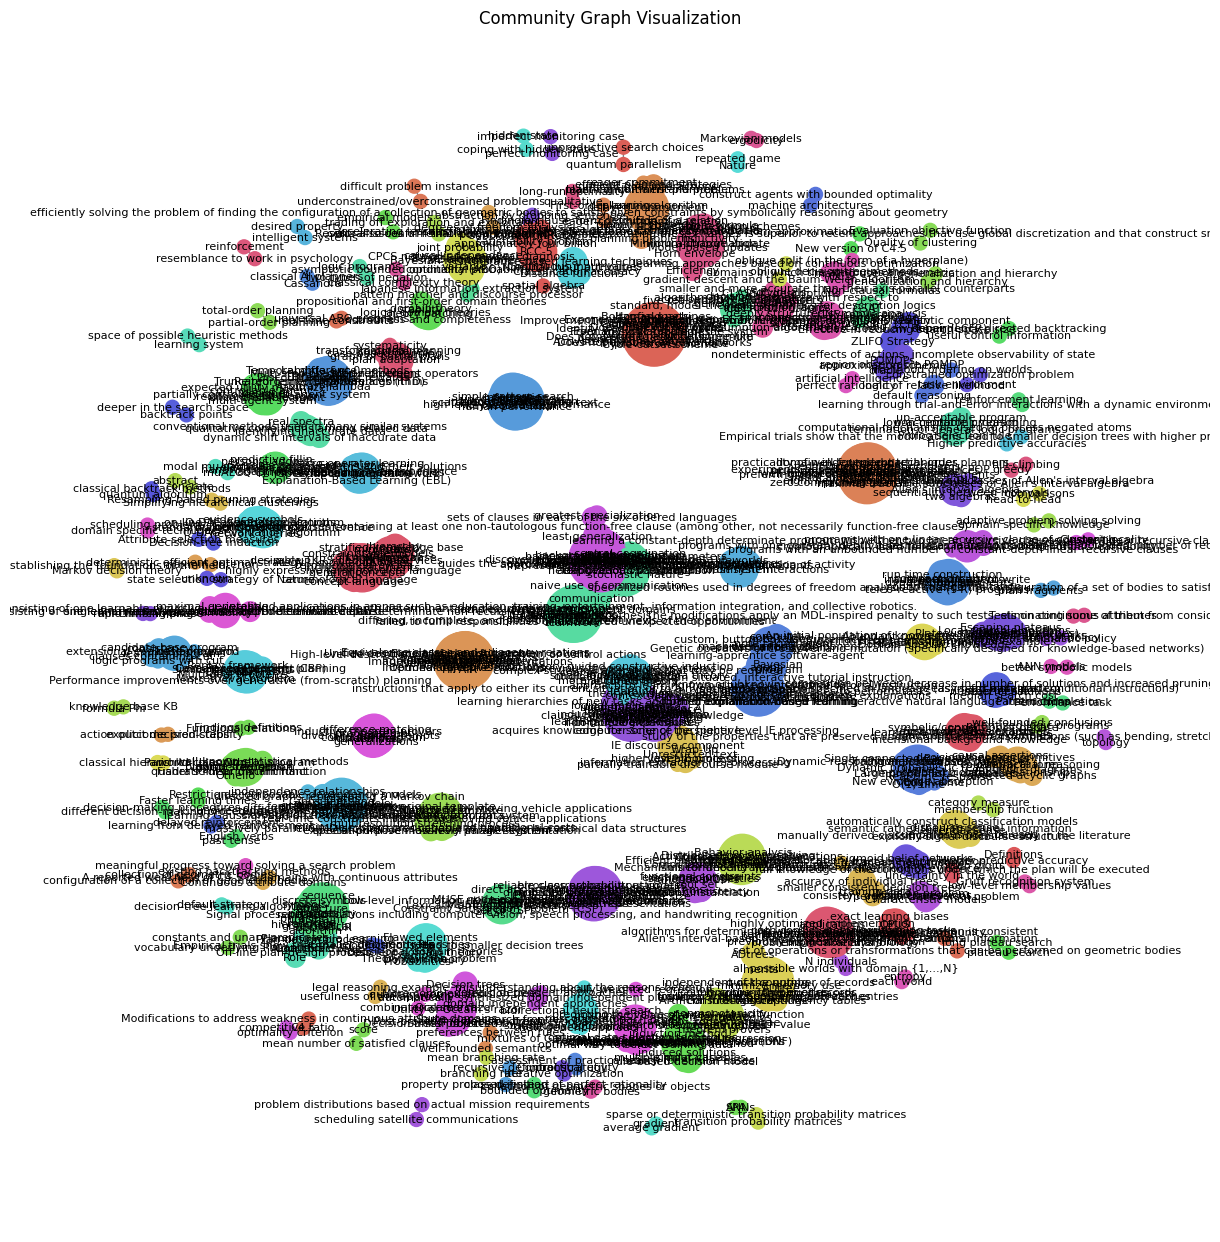

In [74]:
import matplotlib.pyplot as plt

# Get color for each node from the 'color' attribute
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [G.nodes[node]['size'] * 100 for node in G.nodes()]  # Scale for visibility

# Layout: spring_layout is force-directed (nice look)
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 12))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=node_sizes,
    edge_color="gray",
    font_size=8
)
plt.title("Community Graph Visualization")
plt.axis("off")
plt.show()


In [65]:
#pip install pyvis
!pip install scipy


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 320.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 279.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 321.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.2 MB 991.0 kB/s eta 0:00:42
   ---------------------------------------- 0.1/41.2 MB 435.7 kB/s eta 0:01:35
   ---------------------------------------- 0.1/41.2 MB 901.1 kB/s eta 0:00:46
   ---------------------------------------- 0.2/41.2 MB 1.2 MB/s eta 0:00:36
   ---------------------------------------- 0.2/41.2 MB 1.0 MB/s eta 0:00:40
   ---------------------------------------- 0.4/41.2 MB 1.5 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Rizwan Moosa Saya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [80]:
from pyvis.network import Network

net = Network(notebook=True, width="100%", height="900px")

# Add nodes with attributes
for node in G.nodes(data=True):
    net.add_node(
        str(node[0]),
        label=str(node[0]),
        color=node[1]['color'],
        size=node[1]['size'] * 10
    )

# Add edges
for u, v, data in G.edges(data=True):
    net.add_edge(u, v, value=data["weight"], title=data["title"])

# Show it
net.show("community_graph.html")


community_graph.html


In [81]:
import webbrowser
webbrowser.open("community_graph.html")


True

In [76]:
from pyvis.network import Network

graph_output_directory = "index.html"

net = Network(
    notebook=False,
    # bgcolor="#1a1a1a",
    cdn_resources="remote",
    height="900px",
    width="100%",
    select_menu=True,
    # font_color="#cccccc",
    filter_menu=False,
)

net.from_nx(G)
net.repulsion(node_distance=150, spring_length=400)
net.force_atlas_2based(central_gravity=0.015, gravity=-31)
net.barnes_hut(gravity=-18100, central_gravity=5.05, spring_length=380)

net.show(graph_output_directory, notebook=False)

index.html


In [86]:
import pickle

with open("graph_data.gpickle", "wb") as f:
    pickle.dump(G, f)


In [88]:
with open("graph_data.gpickle", "rb") as f:
    G = pickle.load(f)


## recommenders

### kgraph recommmender

In [95]:
def recommend_neighbors(node, G, top_k=5):
    if node not in G:
        return []
    neighbors = list(G.neighbors(node))
    return neighbors

# Example
print(recommend_neighbors("machine learning", G))
def recommend_from_community(node, G, community_data):
    """community_data: a DataFrame with 'node', 'group' columns"""
    if node not in G:
        return []

    group = community_data.loc[community_data["node"] == node, "group"]
    if group.empty:
        return []

    group_nodes = community_data[community_data["group"] == group.values[0]]["node"]
    recommendations = [n for n in group_nodes if n != node]
    return recommendations

# Example usage
# community_df = colors  # the dataframe you created earlier with node-color-group
print(recommend_from_community("machine learning", G, colors))
def recommend_by_centrality(G, top_k=5):
    centrality = nx.degree_centrality(G)
    ranked = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    return [node for node, _ in ranked[:top_k]]

# Example
print(recommend_by_centrality(G))
def smart_recommend(node, G, community_df, top_k=5):
    neighbors = set(recommend_neighbors(node, G, top_k * 2))
    community = set(recommend_from_community(node, G, community_df))
    combined = list(neighbors.union(community))
    
    # Rank by centrality
    centrality = nx.degree_centrality(G)
    combined.sort(key=lambda n: centrality.get(n, 0), reverse=True)
    return combined

# Example
print(smart_recommend("machine learning", G, colors))


['FLARE', 'IE discourse component', 'T-implication', 'computer science perspective', 'inductive learning', 'inductive learning systems', 'intelligence', 'learning', 'acquires knowledge for some of the higher level IE processing', 'clausal representation of knowledge', 'reasoning']
['FLARE', 'T-complete expansions', 'T-implication', 'acquisition', 'classical AI', 'clausal representation of knowledge', 'clauses', 'computer science perspective', 'expansions', 'generalization', 'implication', 'induction', 'inductive learning', 'inductive learning systems', 'intelligence', 'learning', 'learning recursive clauses', 'logical implication', 'non-tautological clauses', 'reasoning', 'recursive clauses', 'theta-subsumption']
['Uniform algorithm', 'inductive learning', 'Imagistic reasoning', 'Implemented problem solver', 'Spatial aggregation']
['inductive learning', 'T-implication', 'inductive learning systems', 'IE discourse component', 'learning', 'reasoning', 'intelligence', 'FLARE', 'learning r

In [113]:
import pandas as pd

# Load necessary data
dfg1 = pd.read_csv("dfg1.csv")  # Contains 'node', 'title'
arxiv = pd.read_csv("arxiv_metadata.csv")  # Contains 'title', 'url', 'abstract'

# Function to get related topics (neighbors in graph)
def recommend_related_topics(node, G, dfg1, arxiv, top_k=5):
    if node not in G:
        print(f"Node '{node}' not found in graph.")
        return []

    # Get neighbors sorted by weight
    neighbors = sorted(
        G[node].items(), key=lambda x: x[1].get("weight", 0), reverse=True
    )
    recommended_nodes = [n for n, _ in neighbors][:top_k]

    # Get unique topic titles for recommended nodes
    titles = dfg1[(dfg1["node_1"].isin(recommended_nodes)) | (dfg1["node_2"].isin(recommended_nodes))]["topic_name"].dropna().unique()

    # Match titles in arxiv and drop duplicates by title
    recommended_papers = arxiv[arxiv["title"].isin(titles)].drop_duplicates("title")

    # Return final formatted list
    results = []
    for _, row in recommended_papers.iterrows():
        results.append({
            "title": row["title"],
            "url": row["pdf_url"],
            "abstract": row["abstract"]
        })

    return results

recommendations = recommend_related_topics("FLARE", G, dfg1, arxiv, top_k=10)

# Show results
for i, rec in enumerate(recommendations, 1):
    print(f"\n[{i}] {rec['title']}")
    print(f" {rec['url']}")
    print(f" {rec['abstract'][:300]}...")



[1] Learning the Past Tense of English Verbs: The Symbolic Pattern   Associator vs. Connectionist Models
 http://arxiv.org/pdf/cs/9402101v1.pdf
 Learning the past tense of English verbs - a seemingly minor aspect of language acquisition - has generated heated debates since 1986, and has become a landmark task for testing the adequacy of cognitive modeling. Several artificial neural networks (ANNs) have been implemented, and a challenge for b...

[2] Cost-Sensitive Classification: Empirical Evaluation of a Hybrid Genetic   Decision Tree Induction Algorithm
 http://arxiv.org/pdf/cs/9503102v1.pdf
 This paper introduces ICET, a new algorithm for cost-sensitive classification. ICET uses a genetic algorithm to evolve a population of biases for a decision tree induction algorithm. The fitness function of the genetic algorithm is the average cost of classification when using the decision tree, inc...

[3] Vision-Based Road Detection in Automotive Systems: A Real-Time   Expectation-Driven Appr

### title based recommender

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load arxiv metadata
arxiv_df = pd.read_csv("arxiv_metadata.csv")

# Drop rows with missing title or abstract
arxiv_df = arxiv_df.dropna(subset=["title", "abstract"])

# Combine title and abstract into a single text column
arxiv_df["text"] = arxiv_df["title"] + " " + arxiv_df["abstract"]

# Vectorize the combined text using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
tfidf_matrix = vectorizer.fit_transform(arxiv_df["text"])

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(tfidf_matrix)

# Map paper titles to their indices
title_to_index = pd.Series(arxiv_df.index, index=arxiv_df["title"].str.lower())

# Recommender function
def recommend_similar_papers(paper_title, top_n=5):
    paper_title = paper_title.lower()
    
    if paper_title not in title_to_index:
        print("Paper title not found.")
        return []

    idx = title_to_index[paper_title]
    sim_scores = list(enumerate(cos_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    recommendations = []
    for i, score in sim_scores:
        recommendations.append({
            "title": arxiv_df.iloc[i]["title"],
            "url": arxiv_df.iloc[i].get("pdf_url", "N/A"),
            "abstract": arxiv_df.iloc[i]["abstract"][:300] + "...",  
            "similarity_score": round(score, 3)
        })
        
    return recommendations

# Example usage
results = recommend_similar_papers("dynamic backtracking", top_n=5)
for r in results:
    print(f"Title: {r['title']}\nURL: {r['url']}\nSimilarity: {r['similarity_score']}\nAbstract: {r['abstract']}\n{'-'*80}")


Title: The Design and Experimental Analysis of Algorithms for Temporal   Reasoning
URL: http://arxiv.org/pdf/cs/9601101v1.pdf
Similarity: 0.278
Abstract: Many applications -- from planning and scheduling to problems in molecular biology -- rely heavily on a temporal reasoning component. In this paper, we discuss the design and empirical analysis of algorithms for a temporal reasoning system based on Allen's influential interval-based framework for re...
--------------------------------------------------------------------------------
Title: Bidirectional Heuristic Search Reconsidered
URL: http://arxiv.org/pdf/cs/9712102v1.pdf
Similarity: 0.163
Abstract: The assessment of bidirectional heuristic search has been incorrect since it was first published more than a quarter of a century ago. For quite a long time, this search strategy did not achieve the expected results, and there was a major misunderstanding about the reasons behind it. Although there ...
-----------------------------------

In [158]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



# Recommender function: now based on *any* query (not just paper titles)
def recommend_similar_papers(query, top_n=5):
    # Load arxiv metadata
    arxiv_df = pd.read_csv("arxiv_metadata.csv")

# Drop rows with missing title or abstract
    arxiv_df = arxiv_df.dropna(subset=["title", "abstract"])

# Combine title and abstract into a single text column
    arxiv_df["text"] = arxiv_df["title"] + " " + arxiv_df["abstract"]

# Vectorize the combined text using TF-IDF
    vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
    tfidf_matrix = vectorizer.fit_transform(arxiv_df["text"])
    # Vectorize the input query using the same TF-IDF vectorizer
    query_vec = vectorizer.transform([query])
    
    # Compute cosine similarity between query and all documents
    sim_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    
    # Get indices of top N similar papers
    top_indices = sim_scores.argsort()[::-1][:top_n]
    
    recommendations = []
    for i in top_indices:
        recommendations.append({
            "title": arxiv_df.iloc[i]["title"],
            "url": arxiv_df.iloc[i].get("pdf_url", "N/A"),
            "abstract": arxiv_df.iloc[i]["abstract"][:300] + "...",  # Truncate abstract
            "similarity_score": round(sim_scores[i], 3)
        })
        
    return recommendations

# Example usage
results = recommend_similar_papers("neural symbolic reasoning", top_n=5)
for r in results:
    print(f"Title: {r['title']}\nURL: {r['url']}\nSimilarity: {r['similarity_score']}\nAbstract: {r['abstract']}\n{'-'*80}")


Title: An Integrated Framework for Learning and Reasoning
URL: http://arxiv.org/pdf/cs/9508102v1.pdf
Similarity: 0.435
Abstract: Learning and reasoning are both aspects of what is considered to be intelligence. Their studies within AI have been separated historically, learning being the topic of machine learning and neural networks, and reasoning falling under classical (or symbolic) AI. However, learning and reasoning are in...
--------------------------------------------------------------------------------
Title: Defeasible Reasoning in OSCAR
URL: http://arxiv.org/pdf/cs/0003012v1.pdf
Similarity: 0.332
Abstract: This is a system description for the OSCAR defeasible reasoner....
--------------------------------------------------------------------------------
Title: Large Language Models are not Models of Natural Language: they are   Corpus Models
URL: http://arxiv.org/pdf/2112.07055v2.pdf
Similarity: 0.326
Abstract: Natural Language Processing (NLP) has become one of the leading appli

In [188]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load datasets
dfg1 = pd.read_csv("dfg1.csv")
arxiv_df = pd.read_csv("arxiv_metadata.csv")

# Drop missing data
dfg1.dropna(subset=["topic_name"], inplace=True)
arxiv_df.dropna(subset=["title", "abstract"], inplace=True)

# Step 1: Vectorize KG node titles and user query
vectorizer = TfidfVectorizer(stop_words="english")
title_embeddings = vectorizer.fit_transform(dfg1["edge"].astype(str))

def get_related_topics_from_query(query, top_n=5):
    query_vec = vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, title_embeddings).flatten()
    top_indices = similarities.argsort()[::-1][:top_n]
    return dfg1.iloc[top_indices]["topic_name"].tolist()

# Step 2: Find connected nodes from knowledge graph
def get_connected_nodes(seed_titles):
    connected_nodes = set()
    for _, row in dfg1.iterrows():
        if row["topic_name"] in seed_titles:
            connected_nodes.add(row["node_1"])
            connected_nodes.add(row["node_2"])
    return list(connected_nodes)

# Step 3: Recommend papers from arxiv_df
def recommend_papers_from_topics(topics, top_n=5):
    # Normalize for case-insensitive matching
    arxiv_df["title_lower"] = arxiv_df["title"].str.lower()
    topic_set = set([t.lower() for t in topics])
    
    matched = arxiv_df[arxiv_df["title_lower"].isin(topic_set)]
    matched = matched.drop_duplicates(subset="title")
    
   
    results = []
    for _, row in matched.head(top_n).iterrows():
        results.append({
            "title": row["title"],
            "url": row.get("pdf_url", "N/A"),
            "abstract": row["abstract"][:300] + "...",
        })
    
    return results

def kg_based_recommender_from_query(query, top_n=5):
    print(f"\n Finding topics related to: \"{query}\"")
    
    related_topics = get_related_topics_from_query(query)
    print(f"Matched Topics: {related_topics}")

    connected_nodes = get_connected_nodes(related_topics)
    
    # Now get the corresponding topics for those nodes
    related_topic_names = dfg1[dfg1["node_1"].isin(connected_nodes) | dfg1["node_2"].isin(connected_nodes)]["topic_name"].unique()
    print(f"Related Topics via Connected Nodes: {list(related_topic_names)}")

    recommendations = recommend_papers_from_topics(related_topic_names, top_n=top_n)
    return recommendations


In [189]:
query = "neural symbolic reasoning"
recommendations = kg_based_recommender_from_query(query, top_n=5)

for r in recommendations:
    print(f"\nTitle: {r['title']}\n URL: {r['url']}\n Abstract: {r['abstract']}\n" + "-"*80)



 Finding topics related to: "neural symbolic reasoning"
Matched Topics: ['Vision-Based Road Detection in Automotive Systems: A Real-Time   Expectation-Driven Approach', 'Learning the Past Tense of English Verbs: The Symbolic Pattern   Associator vs. Connectionist Models', 'Reinforcement Learning: A Survey', 'Vision-Based Road Detection in Automotive Systems: A Real-Time   Expectation-Driven Approach', 'A Domain-Independent Algorithm for Plan Adaptation']
Related Topics via Connected Nodes: ['Learning the Past Tense of English Verbs: The Symbolic Pattern   Associator vs. Connectionist Models', 'A Domain-Independent Algorithm for Plan Adaptation', 'Cost-Sensitive Classification: Empirical Evaluation of a Hybrid Genetic   Decision Tree Induction Algorithm', 'Vision-Based Road Detection in Automotive Systems: A Real-Time   Expectation-Driven Approach', 'Well-Founded Semantics for Extended Logic Programs with Dynamic   Preferences', 'Reinforcement Learning: A Survey', 'Spatial Aggregation:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


def get_query_embedding(query, vectorizer):
    return vectorizer.transform([query])

def evaluate_recommendations(query, recommended_papers, vectorizer, top_n=5):
    query_vec = vectorizer.transform([query])
    similarities = []

    for paper in recommended_papers:
        paper_vec = vectorizer.transform([paper['title']+""+paper['abstract']])
        similarity = cosine_similarity(query_vec, paper_vec)
        similarities.append(similarity.flatten()[0])

    # Attach similarity scores
    scored_papers = []
    for paper, sim in zip(recommended_papers, similarities):
        paper_copy = paper.copy()
        paper_copy['similarity'] = sim
        scored_papers.append(paper_copy)

    sorted_papers = sorted(scored_papers, key=lambda x: x['similarity'], reverse=True)

    for s in sorted_papers[:top_n]:
        print(f"Title: {s['title']}\nURL: {s['url']}\nSimilarity: {s['similarity']:.4f}\nAbstract: {s['abstract']}\n{'-'*80}")

    return sorted_papers


def recommender(query):
    vectorizer = TfidfVectorizer(stop_words='english')
    vectorizer.fit(dfg1["topic_name"].astype(str))  # Fit the vectorizer on the dataset

# Step 1: Vectorize KG node titles and user query
    title_embeddings = vectorizer.transform(dfg1["topic_name"].astype(str))
    recommended_paperskg=kg_based_recommender_from_query(query, top_n=5)

    recommended_paperstfidf=recommend_similar_papers(query, top_n=5)
# Assuming `recommend_papers_from_query` provides the list of recommended papers
    print("\n\nknowlegde graph recommender: ")

    evaluate_recommendations(query,recommended_paperskg,vectorizer)    
    print("\n\ntfidf recommender: ")
    for r in recommended_paperstfidf:
      print(f"Title: {r['title']}\nURL: {r['url']}\nSimilarity: {r['similarity_score']}\nAbstract: {r['abstract']}\n{'-'*80}")
    all_recommendations = recommended_paperskg + recommended_paperstfidf

    # Prepare documents for RAG (each as a dictionary with 'title', 'url', 'abstract')
    documents = []
    for paper in all_recommendations:
        document = {
            'title': paper['title'],
            'url': paper['url'],
            'content': paper['abstract']  # We will treat abstract as the content
        }
        documents.append(document)

    return documents
query = "dynamic backtracking"
recommender(query)



 Finding topics related to: "dynamic backtracking"
Matched Topics: ['Active Learning with Statistical Models', 'Dynamic Backtracking', 'Teleo-Reactive Programs for Agent Control', 'Teleo-Reactive Programs for Agent Control', 'Teleo-Reactive Programs for Agent Control']
Related Topics via Connected Nodes: ['Dynamic Backtracking', 'Teleo-Reactive Programs for Agent Control', 'Active Learning with Statistical Models']


knowlegde graph recommender: 
Title: Dynamic Backtracking
URL: http://arxiv.org/pdf/cs/9308101v1.pdf
Similarity: 0.4225
Abstract: Because of their occasional need to return to shallow points in a search tree, existing backtracking methods can sometimes erase meaningful progress toward solving a search problem. In this paper, we present a method by which backtrack points can be moved deeper in the search space, thereby avoiding...
--------------------------------------------------------------------------------
Title: Teleo-Reactive Programs for Agent Control
URL: http://ar

[{'title': 'Dynamic Backtracking',
  'url': 'http://arxiv.org/pdf/cs/9308101v1.pdf',
  'content': 'Because of their occasional need to return to shallow points in a search tree, existing backtracking methods can sometimes erase meaningful progress toward solving a search problem. In this paper, we present a method by which backtrack points can be moved deeper in the search space, thereby avoiding...'},
 {'title': 'Teleo-Reactive Programs for Agent Control',
  'url': 'http://arxiv.org/pdf/cs/9401101v1.pdf',
  'content': 'A formalism is presented for computing and organizing actions for autonomous agents in dynamic environments. We introduce the notion of teleo-reactive (T-R) programs whose execution entails the construction of circuitry for the continuous computation of the parameters and conditions on which agent a...'},
 {'title': 'Active Learning with Statistical Models',
  'url': 'http://arxiv.org/pdf/cs/9603104v1.pdf',
  'content': "For many types of machine learning algorithms, on

In [199]:
query = "decision-tree learning algorithms"


recommender(query)


 Finding topics related to: "decision-tree learning algorithms"
Matched Topics: ['Learning the Past Tense of English Verbs: The Symbolic Pattern   Associator vs. Connectionist Models', 'Adaptive Load Balancing: A Study in Multi-Agent Learning', 'Pac-Learning Recursive Logic Programs: Efficient Algorithms', 'Adaptive Load Balancing: A Study in Multi-Agent Learning', 'A reusable iterative optimization software library to solve   combinatorial problems with approximate reasoning']
Related Topics via Connected Nodes: ['Learning the Past Tense of English Verbs: The Symbolic Pattern   Associator vs. Connectionist Models', 'Adaptive Load Balancing: A Study in Multi-Agent Learning', 'Pac-Learning Recursive Logic Programs: Efficient Algorithms', 'Vision-Based Road Detection in Automotive Systems: A Real-Time   Expectation-Driven Approach', 'A reusable iterative optimization software library to solve   combinatorial problems with approximate reasoning']


knowlegde graph recommender: 
Title: Pa

# arxiv dataset eda

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("Cornell-University/arxiv")

print("Path to dataset files:", path)

100%|██████████| 1.42G/1.42G [00:13<00:00, 111MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/Cornell-University/arxiv/versions/225


In [ ]:
import kagglehub
import pandas as pd
import json

# Download dataset
path = kagglehub.dataset_download("Cornell-University/arxiv")
json_file = f"{path}/arxiv-metadata-oai-snapshot.json"

# Output file
output_csv = "arxiv_full.csv"

# Process JSON in chunks
chunk_size = 100000  # Adjust based on memory capacity
chunks = []
count = 0

with open(json_file, "r") as f:
    for line in f:
        data = json.loads(line)  # Load a single JSON object
        chunks.append(data)  # Store in list

        # Save in chunks to avoid memory overload
        if len(chunks) >= chunk_size:
            df = pd.DataFrame(chunks)  # Convert chunk to DataFrame
            df.to_csv(output_csv, mode="a", index=False, header=(count == 0))  # Append data
            count += 1
            chunks = []  # Clear memory

# Save remaining data
if chunks:
    df = pd.DataFrame(chunks)
    df.to_csv(output_csv, mode="a", index=False, header=(count == 0))

print(f" Full dataset saved to {output_csv} without dropping any columns.")


✅ Full dataset saved to arxiv_full.csv without dropping any columns.


In [ ]:
df=pd.read_csv("arxiv_full.csv")
df.head(25)

<ipython-input-3-57b5634c04b2>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("arxiv_full.csv")


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,NaN,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[['Balázs', 'C.', ''], ['Berger', 'E. L.', '']..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,NaN,NaN,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[['Streinu', 'Ileana', ''], ['Theran', 'Louis'..."
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,NaN,physics.gen-ph,NaN,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[['Pan', 'Hongjun', '']]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,NaN,math.CO,NaN,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Callan', 'David', '']]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,NaN,math.CA math.FA,NaN,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[['Abu-Shammala', 'Wael', ''], ['Torchinsky', ..."
5,704.0006,Yue Hin Pong,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",NaN,10.1103/PhysRevA.75.043613,NaN,cond-mat.mes-hall,NaN,We study the two-particle wave function of p...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2015-05-13,"[['Pong', 'Y. H.', ''], ['Law', 'C. K.', '']]"
6,704.0007,Alejandro Corichi,"Alejandro Corichi, Tatjana Vukasinac and Jose ...",Polymer Quantum Mechanics and its Continuum Limit,"16 pages, no figures. Typos corrected to match...","Phys.Rev.D76:044016,2007",10.1103/PhysRevD.76.044016,IGPG-07/03-2,gr-qc,NaN,A rather non-standard quantum representation...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-11-26,"[['Corichi', 'Alejandro', ''], ['Vukasinac', '..."
7,704.0008,Damian Swift,Damian C. Swift,Numerical solution of shock and ramp compressi...,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2...",10.1063/1.2975338,"LA-UR-07-2051, LLNL-JRNL-410358",cond-mat.mtrl-sci,http://arxiv.org/licenses/nonexclusive-distrib...,A general formulation was developed to repre...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2009-02-05,"[['Swift', 'Damian C.', '']]"
8,704.0009,Paul Harvey,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...","The Spitzer c2d Survey of Large, Nearby, Inste...",NaN,"Astrophys.J.663:1149-1173,2007",10.1086/518646,NaN,astro-ph,NaN,We discuss the results from the combined IRA...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2010-03-18,"[['Harvey', 'Paul', ''], ['Merin', 'Bruno', ''..."
9,704.001,Sergei Ovchinnikov,Sergei Ovchinnikov,"Partial cubes: structures, characterizations, ...","36 pages, 17 figures",NaN,NaN,NaN,math.CO,NaN,Partial cubes are isometric subgraphs of hyp...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Ovchinnikov', 'Sergei', '']]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700231 entries, 0 to 2700230
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   submitter       object
 2   authors         object
 3   title           object
 4   comments        object
 5   journal-ref     object
 6   doi             object
 7   report-no       object
 8   categories      object
 9   license         object
 10  abstract        object
 11  versions        object
 12  update_date     object
 13  authors_parsed  object
dtypes: object(14)
memory usage: 288.4+ MB


In [ ]:
df.describe()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,2700231,2685041,2700231,2700231,2001391,886168,1232385,184573,2700231,2247444,2700231,2700231,2700231,2700231
unique,2700208,558955,2116823,2696032,1216879,875095,1230141,178965,89052,9,2698414,2688631,5346,2031666
top,math-ph/0605055,EPTCS,CMS Collaboration,Discussion of: A statistical analysis of multi...,10 pages,"Dans Design, Automation and Test in Europe - D...",10.1145/1122445.1122456,CPH-SYM-DNRF92,astro-ph,http://arxiv.org/licenses/nonexclusive-distrib...,This paper has been withdrawn.\n,"[{'version': 'v1', 'created': 'Wed, 27 Jun 201...",2007-05-23,"[['CMS Collaboration', '', '']]"
freq,4,3986,1342,12,8428,128,18,341,86911,1712560,91,103,129978,1342


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil

# Define the source file path
source_path = "/content/arxiv_full.csv"

# Define the destination path in Google Drive
destination_path = "/content/drive/My Drive/arxiv_full.csv"

# Move the file to Google Drive
shutil.move(source_path, destination_path)

print(f" File saved to {destination_path}")


 File saved to /content/drive/My Drive/arxiv_full.csv


In [ ]:
import pandas as pd
import csv
import sys

# Increase field size limit
csv.field_size_limit(sys.maxsize)

# Read the CSV with the Python engine
df = pd.read_csv("/content/drive/My Drive/arxiv_full.csv", engine='python')

# Show first 25 rows
df.head(25)


,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,NaN,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[['Balázs', 'C.', ''], ['Berger', 'E. L.', '']..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,NaN,NaN,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[['Streinu', 'Ileana', ''], ['Theran', 'Louis'..."
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,NaN,physics.gen-ph,NaN,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[['Pan', 'Hongjun', '']]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,NaN,math.CO,NaN,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Callan', 'David', '']]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,NaN,math.CA math.FA,NaN,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[['Abu-Shammala', 'Wael', ''], ['Torchinsky', ..."
5,0704.0006,Yue Hin Pong,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",NaN,10.1103/PhysRevA.75.043613,NaN,cond-mat.mes-hall,NaN,We study the two-particle wave function of p...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2015-05-13,"[['Pong', 'Y. H.', ''], ['Law', 'C. K.', '']]"
6,0704.0007,Alejandro Corichi,"Alejandro Corichi, Tatjana Vukasinac and Jose ...",Polymer Quantum Mechanics and its Continuum Limit,"16 pages, no figures. Typos corrected to match...","Phys.Rev.D76:044016,2007",10.1103/PhysRevD.76.044016,IGPG-07/03-2,gr-qc,NaN,A rather non-standard quantum representation...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-11-26,"[['Corichi', 'Alejandro', ''], ['Vukasinac', '..."
7,0704.0008,Damian Swift,Damian C. Swift,Numerical solution of shock and ramp compressi...,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2...",10.1063/1.2975338,"LA-UR-07-2051, LLNL-JRNL-410358",cond-mat.mtrl-sci,http://arxiv.org/licenses/nonexclusive-distrib...,A general formulation was developed to repre...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2009-02-05,"[['Swift', 'Damian C.', '']]"
8,0704.0009,Paul Harvey,"Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...","The Spitzer c2d Survey of Large, Nearby, Inste...",NaN,"Astrophys.J.663:1149-1173,2007",10.1086/518646,NaN,astro-ph,NaN,We discuss the results from the combined IRA...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2010-03-18,"[['Harvey', 'Paul', ''], ['Merin', 'Bruno', ''..."
9,0704.0010,Sergei Ovchinnikov,Sergei Ovchinnikov,"Partial cubes: structures, characterizations, ...","36 pages, 17 figures",NaN,NaN,NaN,math.CO,NaN,Partial cubes are isometric subgraphs of hyp...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Ovchinnikov', 'Sergei', '']]"


In [ ]:
df.isnull().sum()

,0
id,0
submitter,15190
authors,0
title,0
comments,698840
journal-ref,1814063
doi,1467846
report-no,2515658
categories,0
license,452787


In [ ]:
# Dropping columns with null values
df_dropped = df.dropna(axis=1)

# Displaying the remaining columns
print(df_dropped.columns.tolist())


['id', 'authors', 'title', 'categories', 'abstract', 'versions', 'update_date', 'authors_parsed']


In [ ]:
df=df_dropped
for column in df.select_dtypes(include=['object']).columns
    sns.countplot(y=df[column])
    plt.title(f'Count Plot for {column}')
    plt.show()


In [ ]:
print(f"categories: {df['categories'].nunique()} unique values")
print(df['categories'].value_counts())
print('\n')


categories: 89052 unique values
categories
astro-ph                                            86911
hep-ph                                              82972
quant-ph                                            73424
cs.CV                                               69640
hep-th                                              60148
                                                    ...  
solv-int cond-mat gr-qc hep-lat hep-th nlin.SI          1
solv-int adap-org hep-th math-ph math.MP nlin.SI        1
solv-int adap-org hep-th nlin.AO nlin.SI                1
solv-int math.CV nlin.SI                                1
solv-int hep-th math.CA math.QA nlin.SI                 1
Name: count, Length: 89052, dtype: int64




In [ ]:
# Filter categories starting with 'cs.'
cs_categories = df['categories'].str.lower().str.startswith('cs.')

# Count values of categories that start with 'cs.'
cs_value_counts = df.loc[cs_categories, 'categories'].value_counts()

print(f"Categories starting with 'cs.':")
print(cs_value_counts)
print('\n')


Categories starting with 'cs.':
categories
cs.CV                            69640
cs.CL                            29783
cs.IT math.IT                    23546
cs.LG                            21658
cs.LG stat.ML                    15479
                                 ...  
cs.DS cond-mat.dis-nn cs.AI          1
cs.DC cs.AR cs.CC cs.DS cs.NI        1
cs.SE cs.AI cs.CE cs.MS              1
cs.CL adap-org nlin.AO               1
cs.LG cs.CC cs.LO math.LO            1
Name: count, Length: 24694, dtype: int64




In [ ]:
cs_categories.describe()

,categories
count,2700231
unique,2
top,False
freq,2096442


In [ ]:
# Filter rows where 'categories' starts with 'cs'
filtered_df = df[df['categories'].str.startswith('cs')]

# Display the filtered DataFrame
filtered_df.head()

,id,authors,title,categories,abstract,versions,update_date,authors_parsed
46,0704.0047,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,cs.NE cs.AI,The intelligent acoustic emission locator is...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2009-09-29,"[['Kosel', 'T.', ''], ['Grabec', 'I.', '']]"
49,0704.0050,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,cs.NE cs.AI,Part I describes an intelligent acoustic emi...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[['Kosel', 'T.', ''], ['Grabec', 'I.', '']]"
61,0704.0062,"Rastislav \v{S}r\'amek, Bro\v{n}a Brejov\'a, T...",On-line Viterbi Algorithm and Its Relationship...,cs.DS,"In this paper, we introduce the on-line Vite...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2010-01-25,"[['Šrámek', 'Rastislav', ''], ['Brejová', 'Bro..."
89,0704.0090,Lester Ingber,Real Options for Project Schedules (ROPS),cs.CE cond-mat.stat-mech cs.MS cs.NA physics.d...,Real Options for Project Schedules (ROPS) ha...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2007-05-23,"[['Ingber', 'Lester', '']]"
97,0704.0098,"Jack Raymond, David Saad",Sparsely-spread CDMA - a statistical mechanics...,cs.IT math.IT,"Sparse Code Division Multiple Access (CDMA),...","[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2009-11-13,"[['Raymond', 'Jack', ''], ['Saad', 'David', '']]"


In [ ]:
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 603789 entries, 46 to 2453429
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              603789 non-null  object
 1   authors         603789 non-null  object
 2   title           603789 non-null  object
 3   categories      603789 non-null  object
 4   abstract        603789 non-null  object
 5   versions        603789 non-null  object
 6   update_date     603789 non-null  object
 7   authors_parsed  603789 non-null  object
dtypes: object(8)
memory usage: 41.5+ MB


In [ ]:
filtered_df.describe()


,id,authors,title,categories,abstract,versions,update_date,authors_parsed
count,603789,603789,603789,603789,603789,603789,603789,603789
unique,603789,544277,603321,24694,603483,603122,4953,531954
top,cs/9912021,Sabah Al-Fedaghi,Research Traceability using Provenance Service...,cs.CV,This paper has been withdrawn by the author.\n,"[{'version': 'v1', 'created': 'Wed, 27 Jun 201...",2007-05-23,"[['Al-Fedaghi', 'Sabah', '']]"
freq,1,68,2,69640,9,98,4836,68


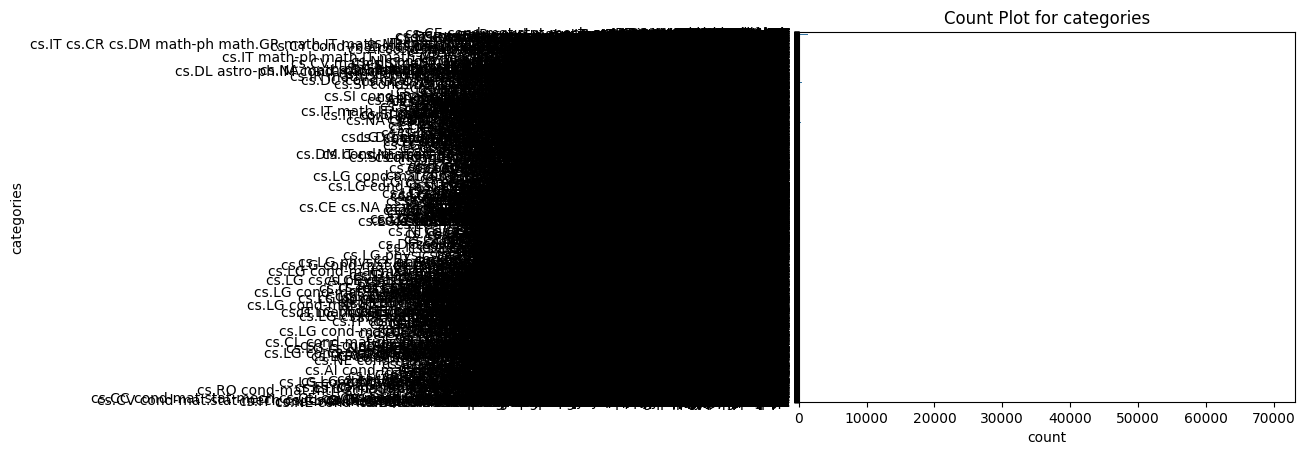

In [ ]:
sns.countplot(y=filtered_df['categories'])
plt.title(f'Count Plot for {"categories"}')
plt.show()

In [ ]:
import nltk
import spacy
import re
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    if pd.isnull(text):
        return ""

    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords

    # Lemmatization using spaCy
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc])

    return text

# Apply text cleaning to titles and abstracts
df["clean_title"] = df["title"].apply(clean_text)
df["clean_abstract"] = df["abstract"].apply(clean_text)

df[["clean_title", "clean_abstract"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Define save path in Google Drive
save_path = "/content/drive/My Drive/arxiv_preprocessed.csv"

# Save the DataFrame
df.to_csv(save_path, index=False)

print(f"✅ Preprocessed CSV saved to: {save_path}")


# summarizer

## download research papers

In [1]:
!pip install feedparser requests


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 650.5 kB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=a2d0b5e519b88689184f625cd39854f7aca5a288af3fe5cd11b3449f7d94c748
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [3]:
import urllib.parse


In [2]:
import os
import requests
import feedparser
import pandas as pd
from time import sleep

SAVE_FOLDER = "/content/drive/MyDrive/nlpproject/arxiv_pdfs"
CSV_FILE = "/content/drive/MyDrive/nlpproject/arxiv_metadata.csv"
os.makedirs(SAVE_FOLDER, exist_ok=True)

topics = {
    "AI": "cat:cs.AI",
    "ML": "cat:cs.LG",
    "LLM": "all:large language models",
    "CV": "cat:cs.CV",
    "Cybersecurity": "all:cybersecurity",
    "Blockchain": "all:blockchain",
    "NLP": "cat:cs.CL",
    "DataMining": "cat:cs.DB"
}

papers_per_topic = 125  # 8 × 125 = 1000
max_results = 100
delay_seconds = 1

metadata = []

for topic, search_query in topics.items():
    print(f"\n Collecting papers for: {topic}")
    start = 0
    downloaded = 0
    while downloaded < papers_per_topic:
        encoded_query = urllib.parse.quote(search_query)
        query = f"http://export.arxiv.org/api/query?search_query={encoded_query}&start={start}&max_results={max_results}"

        feed = feedparser.parse(query)

        if not feed.entries:
            print(" No more entries found.")
            break

        for entry in feed.entries:
            if downloaded >= papers_per_topic:
                break

            # Extract Metadata
            arxiv_id = entry.id.split('/')[-1]
            title = entry.title.strip().replace("\n", " ")
            authors = ', '.join(author.name for author in entry.authors)
            abstract = entry.summary.strip().replace("\n", " ")
            pdf_url = entry.id.replace("abs", "pdf") + ".pdf"
            filename = os.path.join(SAVE_FOLDER, f"{topic}_{arxiv_id}.pdf")

            # Download PDF
            try:
                r = requests.get(pdf_url, timeout=10)
                if r.status_code == 200:
                    with open(filename, 'wb') as f_pdf:
                        f_pdf.write(r.content)
                    print(f"[{topic}] {downloaded+1}: {title[:60]}...")
                    downloaded += 1
                else:
                    print(f" Failed to download: {pdf_url}")
                    continue
            except Exception as e:
                print(f" Error downloading {pdf_url}: {e}")
                continue

            # Append metadata to DataFrame list
            metadata.append({
                "arxiv_id": arxiv_id,
                "title": title,
                "authors": authors,
                "abstract": abstract,
                "topic": topic,
                "pdf_url": pdf_url
            })

            sleep(delay_seconds)

        start += max_results

df = pd.DataFrame(metadata)
df.to_csv(CSV_FILE, index=False)
print(f"\nMetadata saved to: {CSV_FILE}")



[AI] 1: Dynamic Backtracking...
[AI] 2: A Market-Oriented Programming Environment and its Applicatio...
[AI] 3: An Empirical Analysis of Search in GSAT...
[AI] 4: The Difficulties of Learning Logic Programs with Cut...
[AI] 5: Software Agents: Completing Patterns and Constructing User I...
[AI] 6: Decidable Reasoning in Terminological Knowledge Representati...
[AI] 7: Teleo-Reactive Programs for Agent Control...
[AI] 8: Learning the Past Tense of English Verbs: The Symbolic Patte...
[AI] 9: Substructure Discovery Using Minimum Description Length and ...
[AI] 10: Bias-Driven Revision of Logical Domain Theories...
[AI] 11: Exploring the Decision Forest: An Empirical Investigation of...
[AI] 12: A Semantics and Complete Algorithm for Subsumption in the CL...
[AI] 13: Applying GSAT to Non-Clausal Formulas...
[AI] 14: Random Worlds and Maximum Entropy...
[AI] 15: Pattern Matching and Discourse Processing in Information Ext...
[AI] 16: A System for Induction of Oblique Decision Trees...
[AI

InvalidURL: URL can't contain control characters. '/api/query?search_query=all:large language models&start=0&max_results=100' (found at least ' ')

In [5]:
df = pd.DataFrame(metadata)
df.to_csv('/content/drive/MyDrive/nlpproject/arxiv_metadata.csv', index=False)
print(f"\nMetadata saved to: {'/content/drive/MyDrive/nlpproject/arxiv_metadata.csv'}")
df.head()


Metadata saved to: /content/drive/MyDrive/nlpproject/arxiv_metadata.csv


,arxiv_id,title,authors,abstract,topic,pdf_url
0,9308101v1,Dynamic Backtracking,M. L. Ginsberg,Because of their occasional need to return to ...,AI,http://arxiv.org/pdf/cs/9308101v1.pdf
1,9308102v1,A Market-Oriented Programming Environment and ...,M. P. Wellman,Market price systems constitute a well-underst...,AI,http://arxiv.org/pdf/cs/9308102v1.pdf
2,9309101v1,An Empirical Analysis of Search in GSAT,"I. P. Gent, T. Walsh",We describe an extensive study of search in GS...,AI,http://arxiv.org/pdf/cs/9309101v1.pdf
3,9311101v1,The Difficulties of Learning Logic Programs wi...,"F. Bergadano, D. Gunetti, U. Trinchero",As real logic programmers normally use cut (!)...,AI,http://arxiv.org/pdf/cs/9311101v1.pdf
4,9311102v1,Software Agents: Completing Patterns and Const...,"J. C. Schlimmer, L. A. Hermens",To support the goal of allowing users to recor...,AI,http://arxiv.org/pdf/cs/9311102v1.pdf


In [2]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 57.8 MB/s eta 0:00:00


In [5]:
import fitz  # PyMuPDF
import pandas as pd
import os

# Load your metadata CSV
csv_path = "/content/drive/MyDrive/nlpproject/arxiv_metadata.csv"
pdf_folder = "/content/drive/MyDrive/nlpproject/arxiv_pdfs/"
df = pd.read_csv(csv_path)

# Function to extract References section from PDF
def extract_references_from_local_pdf(row):
    topic = row["topic"]
    arxiv_id = row["arxiv_id"]
    filename = f"{topic}_{arxiv_id}.pdf"
    pdf_path = os.path.join(pdf_folder, filename)

    if not os.path.exists(pdf_path):
        return "PDF not found"

    try:
        doc = fitz.open(pdf_path)
        full_text = ""
        for page in doc:
            full_text += page.get_text()

        # Look for "References" or "Bibliography"
        start = full_text.lower().find("references")
        if start == -1:
            start = full_text.lower().find("bibliography")
        if start == -1:
            return "No references found"

        # Extract the first 3000 characters from the references section
        return full_text[start:start + 3000]
    except Exception as e:
        return f"Error reading PDF: {e}"

# Apply function to DataFrame
df["citations"] = df.apply(extract_references_from_local_pdf, axis=1)

# Save updated CSV
output_path = "/content/drive/MyDrive/nlpproject/arxiv_metadata_with_citations.csv"
df.to_csv(output_path, index=False)

print("Citations column added and CSV saved at:", output_path)

Citations column added and CSV saved at: /content/drive/MyDrive/nlpproject/arxiv_metadata_with_citations.csv


In [6]:
df.head()

,arxiv_id,title,authors,abstract,topic,pdf_url,citations
0,9308101v1,Dynamic Backtracking,M. L. Ginsberg,Because of their occasional need to return to ...,AI,http://arxiv.org/pdf/cs/9308101v1.pdf,"References\nBruyno\noghe,\nM.\n(\t).\nSolvi..."
1,9308102v1,A Market-Oriented Programming Environment and ...,M. P. Wellman,Market price systems constitute a well-underst...,AI,http://arxiv.org/pdf/cs/9308102v1.pdf,references\nfor\nconsuming\nv\narious\ncom\nbi...
2,9309101v1,An Empirical Analysis of Search in GSAT,"I. P. Gent, T. Walsh",We describe an extensive study of search in GS...,AI,http://arxiv.org/pdf/cs/9309101v1.pdf,"References\nCheeseman,\nP\n.,\nKanefsky\n,\nB...."
3,9311101v1,The Difficulties of Learning Logic Programs wi...,"F. Bergadano, D. Gunetti, U. Trinchero",As real logic programmers normally use cut (!)...,AI,http://arxiv.org/pdf/cs/9311101v1.pdf,"References\nAha,\nD.,\nLing,\nC.,\nMat\nwin,\n..."
4,9311102v1,Software Agents: Completing Patterns and Const...,"J. C. Schlimmer, L. A. Hermens",To support the goal of allowing users to recor...,AI,http://arxiv.org/pdf/cs/9311102v1.pdf,references as a knowledgable\nsecretary might....


In [8]:
import pandas as pd
import re

# Load the file
df = pd.read_csv("/content/drive/MyDrive/nlpproject/arxiv_metadata_with_citations.csv")

# Clean the citations column
def clean_citation_text(text):
    if pd.isna(text) or "no references found" in text.lower():
        return "No references found"

    # Normalize whitespace and remove newlines
    text = text.replace("\n", " ").replace("\r", " ")
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove leading keywords like "references", "bibliography", etc.
    text = re.sub(r'^(references|bibliography|works cited|literature cited)[:\s]*', '', text, flags=re.IGNORECASE)

    return text

# Apply cleaning
df["citations_clean"] = df["citations"].apply(clean_citation_text)



In [9]:
df['citations_clean']

,citations_clean
0,"Bruyno oghe, M. ( ). Solving com binatorial..."
1,for consuming v arious com binations or bund l...
2,"Cheeseman, P ., Kanefsky , B., & T a ylor, W. ..."
3,"Aha, D., Ling, C., Mat win, S., & Lap oin te, ..."
4,as a knowledgable secretary might. For example...
...,...
995,No references found
996,", whether they are structural links built at t..."
997,"[And90] T.L. Anderson et al., ”The HyperModel ..."
998,"two parts: the source (From), and the destinat..."


In [12]:
# Save updated CSV
output_path = "/content/drive/MyDrive/nlpproject/arxiv_metadata_with_citations.csv"
df.to_csv(output_path, index=False)

print("Citations column added and CSV saved at:", output_path)

Citations column added and CSV saved at: /content/drive/MyDrive/nlpproject/arxiv_metadata_with_citations.csv


In [6]:
import os
import requests
import feedparser
import pandas as pd
from time import sleep
import urllib.parse

SAVE_FOLDER = "/content/drive/MyDrive/nlpproject/arxiv_pdfs"
CSV_FILE = "/content/drive/MyDrive/nlpproject/arxiv_metadata.csv"
os.makedirs(SAVE_FOLDER, exist_ok=True)

topics = {
    "AI": "cat:cs.AI",
    "ML": "cat:cs.LG",
    "LLM": "all:large language models",
    "CV": "cat:cs.CV",
    "Cybersecurity": "all:cybersecurity",
    "Blockchain": "all:blockchain",
    "NLP": "cat:cs.CL",
    "DataMining": "cat:cs.DB"
}

papers_per_topic = 125
max_results = 100
delay_seconds = 1

# Load existing metadata if available
if os.path.exists(CSV_FILE):
    existing_df = pd.read_csv(CSV_FILE)
    downloaded_ids = set(existing_df["arxiv_id"].astype(str))
    print(f"Loaded existing metadata with {len(downloaded_ids)} entries.")
    metadata = existing_df.to_dict("records")
else:
    downloaded_ids = set()
    metadata = []

# Start collecting papers
for topic, search_query in topics.items():
    print(f"\nCollecting papers for: {topic}")
    start = 0
    downloaded = sum(1 for m in metadata if m["topic"] == topic)
    if downloaded >= papers_per_topic:
        print(f"Already have {downloaded} papers for {topic}, skipping.")
        continue

    while downloaded < papers_per_topic:
        encoded_query = urllib.parse.quote(search_query)
        query = f"http://export.arxiv.org/api/query?search_query={encoded_query}&start={start}&max_results={max_results}"
        feed = feedparser.parse(query)

        if not feed.entries:
            print("No more entries found.")
            break

        for entry in feed.entries:
            if downloaded >= papers_per_topic:
                break

            arxiv_id = entry.id.split('/')[-1]
            if arxiv_id in downloaded_ids:
                continue

            title = entry.title.strip().replace("\n", " ")
            authors = ', '.join(author.name for author in entry.authors)
            abstract = entry.summary.strip().replace("\n", " ")
            pdf_url = entry.id.replace("abs", "pdf") + ".pdf"
            filename = os.path.join(SAVE_FOLDER, f"{topic}_{arxiv_id}.pdf")

            try:
                r = requests.get(pdf_url, timeout=10)
                if r.status_code == 200:
                    with open(filename, 'wb') as f_pdf:
                        f_pdf.write(r.content)
                    print(f"[{topic}] {downloaded + 1}: {title[:60]}...")
                    downloaded += 1
                else:
                    print(f"Failed to download: {pdf_url}")
                    continue
            except Exception as e:
                print(f"Error downloading {pdf_url}: {e}")
                continue

            metadata.append({
                "arxiv_id": arxiv_id,
                "title": title,
                "authors": authors,
                "abstract": abstract,
                "topic": topic,
                "pdf_url": pdf_url
            })
            downloaded_ids.add(arxiv_id)

            sleep(delay_seconds)

        start += max_results

# Save metadata to CSV
df = pd.DataFrame(metadata)
df.to_csv(CSV_FILE, index=False)
print(f"\nMetadata saved to: {CSV_FILE}")


Loaded existing metadata with 250 entries.

Already have 125 papers for AI, skipping.

Already have 125 papers for ML, skipping.

[LLM] 1: Lost in Translation: Large Language Models in Non-English Co...
[LLM] 2: Cedille: A large autoregressive French language model...
[LLM] 3: How Good are Commercial Large Language Models on African Lan...
[LLM] 4: Goldfish: Monolingual Language Models for 350 Languages...
[LLM] 5: Modelling Language...
[LLM] 6: LLaMA-Reg: Using LLaMA 2 for Unsupervised Medical Image Regi...
[LLM] 7: A Precis of Language Models are not Models of Language...
[LLM] 8: A Survey of Large Language Models for European Languages...
[LLM] 9: Beyond the limitations of any imaginable mechanism: large la...
[LLM] 10: Enhance Reasoning Ability of Visual-Language Models via Larg...
[LLM] 11: Should we Stop Training More Monolingual Models, and Simply ...
[LLM] 12: Images in Language Space: Exploring the Suitability of Large...
[LLM] 13: The Heap: A Contamination-Free Multilingual C

## basic vector RAG embeddings

In [8]:
!pip install -q langchain openai faiss-cpu tiktoken pypdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 12.9 MB/s eta 0:00:00


In [16]:
!pip install pymupdf


In [7]:
!pip install -U langchain langchain-community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00


In [5]:
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Path to folder containing your PDFs
pdf_folder_path = "/content/drive/MyDrive/nlpproject/arxiv_pdfs"

# Load and split all PDFs
docs = []
for pdf_file in os.listdir(pdf_folder_path):
    if pdf_file.endswith(".pdf"):
        loader = PyPDFLoader(os.path.join(pdf_folder_path, pdf_file))
        docs.extend(loader.load())

# Chunk documents
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.split_documents(docs)


In [19]:
from langchain_community.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os

pdf_folder_path = "/content/drive/MyDrive/nlpproject/arxiv_pdfs"
docs = []

for pdf_file in os.listdir(pdf_folder_path):
    if pdf_file.endswith(".pdf"):
        loader = PyMuPDFLoader(os.path.join(pdf_folder_path, pdf_file))
        docs.extend(loader.load())

# Split
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.split_documents(docs)


In [32]:
!pip install unstructured[local-inference]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.1/526.1 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.4 MB/s eta 0:00:00
   ━━━━━

In [40]:
!apt-get install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.7 [186 kB]
Fetched 186 kB in 0s (373 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.7_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.7) ...
Setting up poppler-utils (22.02.0-2ubuntu0.7) ...
Processing triggers for man-db (2.10.2-1) ...


In [41]:
from langchain_community.document_loaders import UnstructuredPDFLoader
import os

pdf_folder_path = "/content/drive/MyDrive/nlpproject/arxiv_pdfs"
docs = []

for pdf_file in os.listdir(pdf_folder_path):
    if pdf_file.endswith(".pdf"):
        loader = UnstructuredPDFLoader(os.path.join(pdf_folder_path, pdf_file))
        docs.extend(loader.load())


In [18]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 6.8 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
from pathlib import Path
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os

# Path to your Google Drive PDF folder
pdf_folder_path = "/content/drive/MyDrive/nlpproject/arxiv_pdfs"

# Load PDFs using PyPDFDirectoryLoader
loader = PyPDFDirectoryLoader(pdf_folder_path)
documents = loader.load()

In [22]:
len(documents)

18381

In [23]:
import uuid
import pandas as pd

def clean_text(text):
    """Basic text cleaning function."""
    text = text.replace("\n", " ").replace("\r", " ")
    text = " ".join(text.split())  # Remove extra whitespace
    return text

def documents_to_dataframe(docs):
    rows = []
    for doc in docs:
        row = {
            "chunk_id": uuid.uuid4().hex,
            "text": clean_text(doc.page_content),
            **doc.metadata  # usually includes 'source' (file name)
        }
        rows.append(row)
    return pd.DataFrame(rows)

# Convert and clean
df_documents = documents_to_dataframe(documents)

In [25]:
df_documents.head()

,chunk_id,text,producer,creator,creationdate,moddate,title,source,total_pages,page,...,msip_label_a67394b5-34cf-4e9e-a290-a16e11e86116_name,msip_label_a67394b5-34cf-4e9e-a290-a16e11e86116_setdate,msip_label_a67394b5-34cf-4e9e-a290-a16e11e86116_siteid,taxcatchall,lcf76f155ced4ddcb4097134ff3c332f,crossmarkdomains[1],crossmarkdomainexclusive,crossmarkmajorversiondate,doi,rgid
0,de33590fd4e849199988bb268e40c378,Journal of Arti/ cial In telligence Researc h ...,GPL Ghostscript 10.01.2,"dvips 5.499 Copyright 1986, 1993 Radical Eye S...",2024-11-26T15:34:37-05:00,2024-11-26T15:34:37-05:00,dynamic.dvi,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,22,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3a51514b281d44ba814b88910a7f888d,"Ginsber g In b oth cases/, ho w ev er/, note t...",GPL Ghostscript 10.01.2,"dvips 5.499 Copyright 1986, 1993 Radical Eye S...",2024-11-26T15:34:37-05:00,2024-11-26T15:34:37-05:00,dynamic.dvi,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,22,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5973aaa4e68a4704b3a026d0ba6423ca,D ynamic Ba cktra cking We wil l denote a p ar...,GPL Ghostscript 10.01.2,"dvips 5.499 Copyright 1986, 1993 Radical Eye S...",2024-11-26T15:34:37-05:00,2024-11-26T15:34:37-05:00,dynamic.dvi,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,22,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fe4070447f1645008c46ee86f90354d8,Ginsber g Algorithm /2/./5 /(Depth/-/ rst sear...,GPL Ghostscript 10.01.2,"dvips 5.499 Copyright 1986, 1993 Radical Eye S...",2024-11-26T15:34:37-05:00,2024-11-26T15:34:37-05:00,dynamic.dvi,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,22,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15a5a5b8057a42a096cb4c1cff62139f,D ynamic Ba cktra cking Algorithm /3/./1 Given...,GPL Ghostscript 10.01.2,"dvips 5.499 Copyright 1986, 1993 Radical Eye S...",2024-11-26T15:34:37-05:00,2024-11-26T15:34:37-05:00,dynamic.dvi,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,22,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Define output path in your Google Drive
output_path = "/content/drive/MyDrive/nlpproject/df_documents.csv"

# Save DataFrame to CSV
df_documents.to_csv(output_path, index=False)

print(f"df_documents saved to: {output_path}")


df_documents saved to: /content/drive/MyDrive/nlpproject/df_documents.csv


In [15]:
from pathlib import Path
from langchain_community.document_loaders import PyPDFLoader
pdf_folder_path = "/content/drive/MyDrive/nlpproject/arxiv_pdfs"
pdf_paths = sorted(Path(pdf_folder_path).glob("*.pdf"))[:125]  # Load first 100
documents = []
for i, path in enumerate(pdf_paths):
    print(f"Loading {i+1}/{len(pdf_paths)}: {path.name}")
    loader = PyPDFLoader(str(path))
    documents.extend(loader.load())


Loading 1/125: AI_0002002v1.pdf
Loading 2/125: AI_0002003v1.pdf
Loading 3/125: AI_0002009v1.pdf
Loading 4/125: AI_0003008v1.pdf
Loading 5/125: AI_0003012v1.pdf
Loading 6/125: AI_0003016v1.pdf
Loading 7/125: AI_0003020v2.pdf
Loading 8/125: AI_0003021v1.pdf
Loading 9/125: AI_0003023v1.pdf
Loading 10/125: AI_0003024v1.pdf
Loading 11/125: AI_0003027v1.pdf
Loading 12/125: AI_0003028v1.pdf
Loading 13/125: AI_0003029v1.pdf
Loading 14/125: AI_0003030v1.pdf
Loading 15/125: AI_0003031v1.pdf
Loading 16/125: AI_0003032v1.pdf
Loading 17/125: AI_0003033v1.pdf
Loading 18/125: AI_0003034v2.pdf
Loading 19/125: AI_9308101v1.pdf
Loading 20/125: AI_9308102v1.pdf
Loading 21/125: AI_9309101v1.pdf
Loading 22/125: AI_9311101v1.pdf
Loading 23/125: AI_9311102v1.pdf
Loading 24/125: AI_9312101v1.pdf
Loading 25/125: AI_9401101v1.pdf
Loading 26/125: AI_9402101v1.pdf
Loading 27/125: AI_9402102v1.pdf
Loading 28/125: AI_9402103v1.pdf
Loading 29/125: AI_9403101v1.pdf
Loading 30/125: AI_9406101v1.pdf
Loading 31/125: AI_

In [9]:
documents[103]

Document(metadata={'producer': 'dvips + GPL Ghostscript GIT PRERELEASE 9.22', 'creator': 'LaTeX with hyperref package', 'creationdate': '2018-11-08T00:21:06-05:00', 'moddate': '2018-11-08T00:21:06-05:00', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'source': '/content/drive/MyDrive/nlpproject/arxiv_pdfs/AI_0003029v1.pdf', 'total_pages': 7, 'page': 3, 'page_label': '4'}, page_content='by emphasizing the distinction between certainty gen-\neration rules and variation generation ones. There are\ntwo main kinds of certainty generation rules which are\ncertainty rulesand variation rules .\nCertainty rules and inference\nCertainty rules are of the form “the moreu is A the\nmore certainly v lies in B”, for example “the younger a\nman, the more certainly he is single” (according to this\nexample, crisp consequences which are particular cases\nof fuzzy consequences can be taken into account by our\nstudy). These rules are modeled with fuzzy implications\nof the ﬁrst class. They co

In [28]:
docs[8000]

Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-05-14T01:12:31+00:00', 'source': '/content/drive/MyDrive/nlpproject/arxiv_pdfs/LLM_2405.07745v1.pdf', 'file_path': '/content/drive/MyDrive/nlpproject/arxiv_pdfs/LLM_2405.07745v1.pdf', 'total_pages': 14, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2024-05-14T01:12:31+00:00', 'trapped': '', 'modDate': 'D:20240514011231Z', 'creationDate': 'D:20240514011231Z', 'page': 11}, page_content='Grave, and Guillaume Lample. 2023a. Llama: Open\nand efficient foundation language models.\nHugo Touvron, Louis Martin, Kevin Stone, Peter Al-\nbert, Amjad Almahairi, Yasmine Babaei, Nikolay\nBashlykov, Soumya Batra, Prajjwal Bhargava, Shruti\nBhosale, et al. 2023b.\nLlama 2: Open founda-\ntion and fine-tuned chat models.\narXiv preprint\narXiv:2307.09288.\nGökçe Uludo˘gan, Zeynep Yirmibe¸so˘glu Balal, Furkan\nAkkurt, Melik¸sah Türker, Onur Güngör, and Susan

In [17]:
# Chunk the documents
from langchain.text_splitter import RecursiveCharacterTextSplitter
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1500,
    chunk_overlap=150,
    length_function=len,
    is_separator_regex=False,
)

pages = splitter.split_documents(documents)

# Show results
print("Number of chunks =", len(pages))
print("\nSample Chunk:\n", pages[3].page_content)
print("\nMetadata:", pages[3].metadata)

Number of chunks = 9422

Sample Chunk:
 provide no insights into constructive processes agents
might use to build their belief sets based on default
or modal theories describing base facts. Finally, there
is a problem of high computational complexity of rea-
soning with extensions and expansions. The problems
to decide the existence of an extension (expansion) is
Σ2
P-complete, the problem to compute the intersection
of extensions (expansions) — it is needed for skeptical
reasoning — is Π2
P-hard.
In this paper we develop a unifying semantic treat-
ment of default and autoepistemic logics and use it
to address the three issues discussed above. For each
logic we deﬁne a family of 2-, 3- and 4-valued semantics
and show that they include all major semantics for de-
fault and autoepistemic logics. Within our framework
we deﬁne semantics that generalize Kripke-Kleene and
well-founded semantics for logic programs. These se-
mantics allow us to approximate skeptical default and
autoepistemic 

In [16]:
# Check first chunk to confirm
print(chunks[0].page_content[:500])  # Preview first 500 characters of the first chunk

Journal of Arti/cial In telligence Researc h /1 /(/1/9/9/3/) /2/5/-/4/6 Submitted /7///9/3/; published /8///9/3
Dynamic Bac ktrac king
Matthew L/. Ginsb erg ginsber g/@cs/.uoregon/.edu
CIRL/, University of Or e gon/,
Eugene/, OR /9/7/4/0/3/-/1/2/6/9 USA
Abstract
Because of their o ccasional need to return to shallo w p oin ts in a searc h tree/, existing
bac ktrac king metho ds can sometimes erase meaningful progress to w ard solving a searc h
problem/. In this pap er/, w e presen t a metho d b


In [5]:
!pip install sentence-transformers faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 54.1 MB/s eta 0:00:00


In [18]:
df = documents2Dataframe(pages)
print(df.shape)
df.head()

(9422, 14)


,text,producer,creator,creationdate,moddate,title,source,total_pages,page,page_label,chunk_id,author,subject,keywords
0,arXiv:cs/0002002v1 [cs.AI] 3 Feb 2000\nUnifo...,GPL Ghostscript GIT PRERELEASE 9.22,dvips(k) 5.86 Copyright 1999 Radical Eye Software,2018-10-28T19:44:38-04:00,2018-10-28T19:44:38-04:00,arXiv:cs/0002002v1 [cs.AI] 3 Feb 2000,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,11,0,1,d90f782a25d94caa9ed22d41faa7b728,NaN,NaN,NaN
1,and Reiter are given bydiﬀerent operators\nand...,GPL Ghostscript GIT PRERELEASE 9.22,dvips(k) 5.86 Copyright 1999 Radical Eye Software,2018-10-28T19:44:38-04:00,2018-10-28T19:44:38-04:00,arXiv:cs/0002002v1 [cs.AI] 3 Feb 2000,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,11,0,1,69c3f7f0185e4ece9dd193e65df76ed4,NaN,NaN,NaN
2,"[Kon88, MT89a, Tru91, MT93, Got95] no truly sa...",GPL Ghostscript GIT PRERELEASE 9.22,dvips(k) 5.86 Copyright 1999 Radical Eye Software,2018-10-28T19:44:38-04:00,2018-10-28T19:44:38-04:00,arXiv:cs/0002002v1 [cs.AI] 3 Feb 2000,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,11,0,1,c5da1a2e3e874faaa973a5044fce8fa2,NaN,NaN,NaN
3,provide no insights into constructive processe...,GPL Ghostscript GIT PRERELEASE 9.22,dvips(k) 5.86 Copyright 1999 Radical Eye Software,2018-10-28T19:44:38-04:00,2018-10-28T19:44:38-04:00,arXiv:cs/0002002v1 [cs.AI] 3 Feb 2000,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,11,1,2,6e78cdcede8b4f97938fa8d5a03a3b59,NaN,NaN,NaN
4,"logic programs with negation [Fit99], and exte...",GPL Ghostscript GIT PRERELEASE 9.22,dvips(k) 5.86 Copyright 1999 Radical Eye Software,2018-10-28T19:44:38-04:00,2018-10-28T19:44:38-04:00,arXiv:cs/0002002v1 [cs.AI] 3 Feb 2000,/content/drive/MyDrive/nlpproject/arxiv_pdfs/A...,11,1,2,a2f67d8927364475bd13d028c67ca94e,NaN,NaN,NaN


In [21]:
df['text'].head(40)

,text
0,arXiv:cs/0002002v1 [cs.AI] 3 Feb 2000\nUnifo...
1,and Reiter are given bydiﬀerent operators\nand...
2,"[Kon88, MT89a, Tru91, MT93, Got95] no truly sa..."
3,provide no insights into constructive processe...
4,"logic programs with negation [Fit99], and exte..."
5,operator DT on the set of all possible-world s...
6,tics for default theories. Among these semanti...
7,about further generalizations and open problem...
8,"HQ,J (ϕ ) = t, and HQ,I (Kϕ ) = f, otherwise.\..."
9,in which the agent establishes the estimates P...


In [25]:
from sentence_transformers import SentenceTransformer
from langchain.vectorstores import FAISS
import os

# Initialize a pre-trained model from Sentence Transformers for embeddings
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')  # You can choose another model

# Collecting the texts from the pages
#texts = [doc.page_content for doc in pages]

# Generate embeddings for the texts (not yet zipped with the texts)
embeddings = embedding_model.encode(df['text'], convert_to_tensor=True)
embeddings = embeddings.cpu()
# Create a list of (text, embedding) pairs
text_embedding_pairs = list(zip(df['text'], embeddings))

# Create a FAISS vector store from the (text, embedding) pairs
vectorstore = FAISS.from_embeddings(text_embedding_pairs, embedding_model)

# Save the FAISS index to a local directory
vectorstore.save_local("/content/drive/MyDrive/nlpproject/faiss_index")


In [26]:
vectorstore

In [28]:
from transformers import pipeline
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA

# Set up HuggingFace text generation pipeline
hf_pipeline = pipeline("text-generation", model="gpt2", tokenizer="gpt2", device=0)

# Wrap in LangChain-compatible LLM
llm = HuggingFacePipeline(pipeline=hf_pipeline)

# Build QA chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=vectorstore.as_retriever(),
    return_source_documents=True
)

Device set to use cuda:0
<ipython-input-28-6e396bf33f49>:9: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=hf_pipeline)


In [3]:
!pip install langchain-huggingface # Install the langchain-huggingface package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [14]:
!pip install transformers


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA

# Load the T5 model and tokenizer from HuggingFace
model_name = "t5-large"  
model = T5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = T5Tokenizer.from_pretrained(model_name)

# Function to summarize text using T5
def summarize_text(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=500, min_length=100, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Create a custom summarization chain using T5
def summarize_documents(docs):
    document_content = "\n".join([doc.page_content for doc in docs])  # Combine retrieved document content
    return summarize_text(document_content)

# Retrieve relevant documents
retriever = vectorstore.as_retriever()
docs = retriever.get_relevant_documents("define supervised and unsupervised learning")

# Get the summarized result for the retrieved content
summary = summarize_documents(docs)

# Show summary
print("\nSummary:\n", summary)



Summary:
 instance-based learning (iBL) is a paradigm of learning in which algorithms typically store some or all of the n available training examples ( instances) each instance has an input vector x, and an output class c . some instance-based learning algorithms are referred to as nearest neighbor techniques . this allo ws commonalities b et w een seemingly div erse pairs of algorithms/, their derivation/, and their in terrelationships can b


In [16]:
retriever = vectorstore.as_retriever()
docs = retriever.get_relevant_documents("define supervised and unsupervised learning")
# Get the summarized result for the retrieved content
summary = summarize_documents(docs)

# Show summary
print("\nSummary:\n", summary)


Summary:
 instance-based learning is a paradigm of learning in which algorithms typically store some or all of the n available training examples ( instances) each instance has an input vector x, and an output class c . some instance-based learning algorithms are referred to as nearest neighbor techniques .


In [19]:
retriever = vectorstore.as_retriever()
docs = retriever.get_relevant_documents("current AI trends")
# Get the summarized result for the retrieved content
summary = summarize_documents(docs)

# Show summary
print("\nSummary:\n", summary)


Summary:
 SCHLIMMER & W ELLS 348 Acknowledgments Kerry Hersh Raghavendra provided the names used in Section 4 . apple computer developed and supports Newton and the Newton ToolKit programming environment . this work was supported in part by NASA under grant number NCC 2-794 . the Newton AI group at WSU provided many useful comments on an earlier draft of this paper. a number of anonymous reviewers of an earlier draft of this paper provided man y (many) valuable suggestions.


## abstract embedding

In [5]:
df=pd.read_csv('/content/drive/MyDrive/nlpproject/df_documents.csv')

<ipython-input-5-4e8cd5ce5a3d>:1: DtypeWarning: Columns (10,14,15,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/nlpproject/df_documents.csv')


In [8]:
df['text'][0]

"Journal of Arti/ cial In telligence Researc h /1 /(/1/9/9/3/) /2/5/-/4/6 Submitted /7///9/3/; published /8///9/3 Dynamic Bac ktrac king Matthew L/. Ginsb erg ginsber g/@cs/.uoregon/.edu CIRL/, University of Or e gon/, Eugene/, OR /9/7/4/0/3/-/1/2/6/9 USA Abstract Because of their o ccasional need to return to shallo w p oin ts in a searc h tree/, existing bac ktrac king metho ds can sometimes erase meaningful progress to w ard solving a searc h problem/. In this pap er/, w e presen t a metho d b y whic h bac ktrac k p oin ts can b e mo v ed deep er in the searc h space/, thereb y a v oiding this di/\x0ecult y /. The tec hnique dev elop ed is a v arian t of dep endency/-direc ted bac ktrac king that uses only p olynomial space while still pro viding useful con trol information and retaining the completeness guaran tees pro vided b y earlier approac hes/. /1/. In tro duction Imagine that y ou are trying to solv e some constrain t/-satisfaction problem/, or csp /. In the in terests of de

In [10]:
!pip install transformers sentencepiece

from transformers import pipeline


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


In [11]:
from transformers import pipeline

# Use Flan-T5 for instruction-following capability
cleaner = pipeline("text2text-generation", model="google/flan-t5-base")


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
def clean_text_t5(text, max_length=512):
    # Truncate to avoid token overflow, T5 has a max token limit
    prompt = f"Fix and clean the following broken text from a PDF:\n{text[:max_length]}"

    result = cleaner(prompt, max_length=max_length, truncation=True)
    return result[0]["generated_text"]
# If your dataframe is named df_documents and has a 'text' column
df["cleaned_text"] = df["text"].apply(lambda x: clean_text_t5(x))


In [4]:
df=pd.read_csv('/content/drive/MyDrive/nlpproject/arxiv_metadata.csv')
df.shape

(1000, 6)

In [5]:
df['abstract'][0]

'Because of their occasional need to return to shallow points in a search tree, existing backtracking methods can sometimes erase meaningful progress toward solving a search problem. In this paper, we present a method by which backtrack points can be moved deeper in the search space, thereby avoiding this difficulty. The technique developed is a variant of dependency-directed backtracking that uses only polynomial space while still providing useful control information and retaining the completeness guarantees provided by earlier approaches.'

In [10]:
!pip install langchain sentence-transformers faiss-cpu transformers
!pip install -U langchain-community
!pip install transformers sentence-transformers faiss-cpu langchain pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [11]:
import pandas as pd
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.schema import Document
from langchain.llms import HuggingFacePipeline
from langchain.chains import RetrievalQA
from transformers import pipeline
from tqdm import tqdm

# Load data
df = pd.read_csv("/content/drive/MyDrive/nlpproject/arxiv_metadata.csv")
df.dropna(subset=["abstract", "topic"], inplace=True)

# Merge topic and abstract
docs = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    content = f"Title: {row['title']}\nTopic: {row['topic']}\nAbstract: {row['abstract']}"
    docs.append(Document(page_content=content, metadata={"source": row["pdf_url"]}))
embedding = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
db = FAISS.from_documents(docs, embedding)
retriever = db.as_retriever(search_kwargs={"k": 5})
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# T5 text2text pipeline
llm_pipeline = pipeline(
    "text2text-generation",
    model="google/flan-t5-large",
    tokenizer="google/flan-t5-large",
    max_length=256,
    device=0
)

llm = HuggingFacePipeline(pipeline=llm_pipeline)
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    chain_type="stuff"  # you can also try "map_reduce" for long contexts
)


100%|██████████| 1000/1000 [00:00<00:00, 15997.38it/s]
<ipython-input-11-7b9b28bc862b>:19: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still opti

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu
<ipython-input-11-7b9b28bc862b>:33: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=llm_pipeline)


In [12]:
import textwrap
query = "explain dynamic backtracking"
result = qa_chain.invoke(query)
wrapped_answer = textwrap.fill(result['result'], width=100)
print(" \nQuery: ",query,"\n answer: ",wrapped_answer)
query = "explain clustering algorithms"
result = qa_chain.invoke(query)
wrapped_answer = textwrap.fill(result['result'], width=100)
print(" \nQuery: ",query,"\n answer: ",wrapped_answer)
query = "explain macro learning"
result = qa_chain.invoke(query)
wrapped_answer = textwrap.fill(result['result'], width=100)
print(" \nQuery: ",query,"\n answer: ",wrapped_answer)


Token indices sequence length is longer than the specified maximum sequence length for this model (1073 > 512). Running this sequence through the model will result in indexing errors


 
Query:  explain dynamic backtracking 
 answer:  Abstract: Because of their occasional need to return to shallow points in a search tree, existing
backtracking methods can sometimes erase meaningful progress toward solving a search problem. In
this paper, we present a method by which backtrack points can be moved deeper in the search space,
thereby avoiding this difficulty.
 
Query:  explain clustering algorithms 
 answer:  Abstract: In this paper, we combine the quantum random walk (QRW) with the problem of data
clustering, and develop two clustering algorithms based on the one dimensional QRW.
 
Query:  explain macro learning 
 answer:  Abstract: One of the most common mechanisms used for speeding up problem solvers is macro-learning.
Macros are sequences of basic operators acquired during problem solving. Macros are used by the
problem solver as if they were basic operators. The major problem that macro-learning presents is
the vast number of macros that are available for acquisiti

In [225]:
import ollama
def retrieve_documents(query, top_n=5):
    # Use your recommender system
    return recommender(query)

def build_prompt(query, retrieved_papers):
    context = "\n\n".join([paper['content'] for paper in retrieved_papers])
    prompt = f"""
    You are a helpful research assistant.
    Given the following paper abstracts, answer the user's question.

    User's Question: {query}

    Paper Abstracts:
    {context}

    Answer:"""
    return prompt


def generate_answer(prompt):
    return ask_mistral(prompt)

# Full RAG pipeline
def rag_pipeline(query):
    papers = retrieve_documents(query)
    prompt = build_prompt(query, papers)
    answer = generate_answer(prompt)
    return answer


In [ ]:
query = "explain dynamic backtracking"
result=rag_pipeline(query)
wrapped_answer = textwrap.fill(result['result'], width=100)
print(" \nQuery: ",query,"\n answer: ",wrapped_answer)



 Finding topics related to: "explain dynamic backtracking"
Matched Topics: ['Active Learning with Statistical Models', 'Cached Sufficient Statistics for Efficient Machine Learning with Large   Datasets', 'Dynamic Backtracking', 'Teleo-Reactive Programs for Agent Control', 'Teleo-Reactive Programs for Agent Control']
Related Topics via Connected Nodes: ['Dynamic Backtracking', 'Teleo-Reactive Programs for Agent Control', 'Active Learning with Statistical Models', 'Cached Sufficient Statistics for Efficient Machine Learning with Large   Datasets']


knowlegde graph recommender: 
Title: Dynamic Backtracking
URL: http://arxiv.org/pdf/cs/9308101v1.pdf
Similarity: 0.4225
Abstract: Because of their occasional need to return to shallow points in a search tree, existing backtracking methods can sometimes erase meaningful progress toward solving a search problem. In this paper, we present a method by which backtrack points can be moved deeper in the search space, thereby avoiding...
-----------

NameError: name 'textwrap' is not defined

In [229]:
import textwrap
wrapped_answer = textwrap.fill(result, width=100)
print(" \nQuery: ",query,"\n answer: ",wrapped_answer)


 
Query:  explain dynamic backtracking 
 answer:   Dynamic backtracking is a method used in search algorithms to move backtrack points deeper in the
search space, thus avoiding the erasure of meaningful progress toward solving a problem. This
technique helps to maintain progress even when the algorithm needs to return to previous steps in
the search tree. The idea is to minimize the number of times shallow backtracks are required and
instead focus on advancing deeper into the search space before backtracking. This concept is
particularly useful for problems that involve searching large solution spaces, such as those found
in artificial intelligence or autonomous agent environments. It's important to note that this
explanation is based on information derived from the provided abstracts, and it may not cover all
aspects of dynamic backtracking in a comprehensive manner.


In [230]:
query = "explain clustering algorithms and unsupervised learning"
result=rag_pipeline(query)
wrapped_answer = textwrap.fill(result, width=100)
print(" \nQuery: ",query,"\n answer: ",wrapped_answer)



 Finding topics related to: "explain clustering algorithms and unsupervised learning"
Matched Topics: ['2Planning for Contingencies: A Decision-based Approach', '2Planning for Contingencies: A Decision-based Approach', 'Pac-Learning Recursive Logic Programs: Efficient Algorithms', 'Towards Flexible Teamwork', 'Cached Sufficient Statistics for Efficient Machine Learning with Large   Datasets']
Related Topics via Connected Nodes: ['Pac-Learning Recursive Logic Programs: Efficient Algorithms', '2Planning for Contingencies: A Decision-based Approach', 'Towards Flexible Teamwork', 'Cached Sufficient Statistics for Efficient Machine Learning with Large   Datasets']


knowlegde graph recommender: 
Title: Cached Sufficient Statistics for Efficient Machine Learning with Large   Datasets
URL: http://arxiv.org/pdf/cs/9803102v1.pdf
Similarity: 0.3210
Abstract: This paper introduces new algorithms and data structures for quick counting for machine learning datasets. We focus on the counting task o

In [235]:
import streamlit as st
st.set_page_config(page_title="Research Paper Recommender + RAG Assistant", layout="wide")

st.title("📚 Research Paper Recommender + AI Summarizer")

query = st.text_input("Enter your query:", placeholder="e.g., Explain dynamic backtracking...")

if st.button("Get Recommendations and Summary"):
    if query.strip() == "":
        st.warning("Please enter a query!")
    else:
        with st.spinner('🔄 Generating recommendations and summary...'):
            papers, answer = rag_pipeline(query)

        # Display Recommended Papers
        st.subheader("🔎 Recommended Papers")
        for idx, paper in enumerate(papers, 1):
            st.markdown(f"**{idx}. [{paper.get('title', 'No Title')}]({paper.get('url', '#')})**")
            st.markdown(f"**Abstract:** {paper.get('abstract', 'No Abstract')}")
            st.markdown("---")

        # Display RAG Answer
        st.subheader("📝 AI Generated Answer (RAG)")
        wrapped_answer = textwrap.fill(answer, width=100)
        st.write(wrapped_answer)

2025-04-28 17:52:03.822 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 17:52:03.833 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 17:52:04.371 
  command:

    streamlit run C:\Users\Rizwan Moosa Saya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-28 17:52:04.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 17:52:04.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-28 17:52:04.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [234]:
!pip install streamlit


  Using cached streamlit-1.44.1-py3-none-any.whl.metadata (8.9 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached pyarrow-20.0.0-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached narwhals-1.37.0-py3-none-any.whl.metadata (9.3 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Rizwan Moosa Saya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
